In [259]:
# import the essentials
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

## Dataset imports

### Asthma 1 (not used or what?)

In [260]:
from datetime import datetime

# Import asthma dataset
date_parser = lambda date : datetime.strptime(date, "%Y")
df = pd.read_csv(
    "Asthma Hospitalizations.csv",
    dtype={
        "Data":"float64"
    },
    parse_dates=["TimeFrame"],
    date_parser=date_parser
)
df["Year"] = df.TimeFrame.apply(lambda date: date.year)
print(df.dtypes)
df

Location              object
Age Group             object
TimeFrame     datetime64[ns]
DataFormat            object
Data                 float64
Fips                  object
Year                   int64
dtype: object


Location      Age Group  TimeFrame DataFormat    Data  \
0                 New York City   0 to 4 years 2000-01-01     Number  5727.0   
1                 New York City   0 to 4 years 2001-01-01     Number  6024.0   
2                 New York City   0 to 4 years 2003-01-01     Number  6591.0   
3                 New York City   0 to 4 years 2004-01-01     Number  5823.0   
4                 New York City   0 to 4 years 2005-01-01     Number  5027.0   
...                         ...            ...        ...        ...     ...   
3258  South Beach - Tottenville   0 to 4 years 2005-01-01     Number    26.0   
3259  South Beach - Tottenville  5 to 17 Years 2005-01-01     Number    22.0   
3260  South Beach - Tottenville   0 to 4 years 2001-01-01     Number    29.0   
3261  South Beach - Tottenville   0 to 4 years 2003-01-01     Number    36.0   
3262  South Beach - Tottenville   0 to 4 years 2000-01-01     Number    39.0   

         Fips  Year  
0     3651000  2000  
1     3651000  2001  
2     3651000  2003  
3     3651000  2004  
4     3651000  2005  
...       ...   ...  
3258   uhf504  2005  
3259   uhf504  2005  
3260   uhf504  2001  
3261   uhf504  2003  
3262   uhf504  2000  

[3263 rows x 7 columns]

In [261]:
# there is a problem with 0-4 years being in lower caps
df["Age Group"].unique()

array(['0 to 4 years', '5 to 17 Years', '0 to 17 Years'], dtype=object)

In [262]:
# we fix that
df["Age Group"] = df["Age Group"].str.replace("y","Y")

In [263]:
df

Location      Age Group  TimeFrame DataFormat    Data  \
0                 New York City   0 to 4 Years 2000-01-01     Number  5727.0   
1                 New York City   0 to 4 Years 2001-01-01     Number  6024.0   
2                 New York City   0 to 4 Years 2003-01-01     Number  6591.0   
3                 New York City   0 to 4 Years 2004-01-01     Number  5823.0   
4                 New York City   0 to 4 Years 2005-01-01     Number  5027.0   
...                         ...            ...        ...        ...     ...   
3258  South Beach - Tottenville   0 to 4 Years 2005-01-01     Number    26.0   
3259  South Beach - Tottenville  5 to 17 Years 2005-01-01     Number    22.0   
3260  South Beach - Tottenville   0 to 4 Years 2001-01-01     Number    29.0   
3261  South Beach - Tottenville   0 to 4 Years 2003-01-01     Number    36.0   
3262  South Beach - Tottenville   0 to 4 Years 2000-01-01     Number    39.0   

         Fips  Year  
0     3651000  2000  
1     3651000  2001  
2     3651000  2003  
3     3651000  2004  
4     3651000  2005  
...       ...   ...  
3258   uhf504  2005  
3259   uhf504  2005  
3260   uhf504  2001  
3261   uhf504  2003  
3262   uhf504  2000  

[3263 rows x 7 columns]

In [264]:
# divide according to datatype and drop "dataformat"
df_num = df[df.DataFormat == "Number"]
df_rate = df[df.DataFormat == "Rate"]
df_num = df_num.rename(columns={"Data":"Numbers"})
df_num = df_num.drop(columns="DataFormat")
df_rate = df_rate.rename(columns={"Data":"Rate"})
df_rate = df_rate.drop(columns="DataFormat")

In [265]:
# df num has a age group that is just the sum of the other two
print(df_num["Age Group"].unique())
print(df_rate["Age Group"].unique())

['0 to 4 Years' '5 to 17 Years' '0 to 17 Years']
['0 to 4 Years' '5 to 17 Years']


In [266]:
# we remove that
df_num = df_num[df_num["Age Group"] != "0 to 17 Years"]
df_num["Age Group"].unique()

array(['0 to 4 Years', '5 to 17 Years'], dtype=object)

In [267]:
# for some reason, there is a single datapoint less in rate than in numbers. We ignore this one datapoint
df_merged = pd.merge(df_num, df_rate, on = ["Location", "Age Group", "TimeFrame", "Fips", "Year"], how = "outer")
print(df_merged.shape)
df_merged[df_merged.Rate.isna()]

(1344, 7)


Location     Age Group  TimeFrame  Numbers   Fips  Year  Rate
64    Bronx  0 to 4 Years 2006-01-01   1766.0  36005  2006   NaN

In [268]:
# merge datasets and rename
df_merged = pd.merge(df_num, df_rate, on = ["Location", "Age Group", "TimeFrame", "Fips", "Year"], how = "inner")
df_hosp = df_merged

In [269]:
# split timeframe into day month and year
df_hosp["Month"] = df_hosp.TimeFrame.apply(lambda date : date.month)
df_hosp["Day"] = df_hosp.TimeFrame.apply(lambda date : date.day)

# rename columns with spaces
df_hosp.rename(
    columns = {"Age Group" : "AgeGroup"}
)

Location       AgeGroup  TimeFrame  Numbers     Fips  \
0                 New York City   0 to 4 Years 2000-01-01   5727.0  3651000   
1                 New York City   0 to 4 Years 2001-01-01   6024.0  3651000   
2                 New York City   0 to 4 Years 2003-01-01   6591.0  3651000   
3                 New York City   0 to 4 Years 2004-01-01   5823.0  3651000   
4                 New York City   0 to 4 Years 2005-01-01   5027.0  3651000   
...                         ...            ...        ...      ...      ...   
1338  South Beach - Tottenville   0 to 4 Years 2005-01-01     26.0   uhf504   
1339  South Beach - Tottenville  5 to 17 Years 2005-01-01     22.0   uhf504   
1340  South Beach - Tottenville   0 to 4 Years 2001-01-01     29.0   uhf504   
1341  South Beach - Tottenville   0 to 4 Years 2003-01-01     36.0   uhf504   
1342  South Beach - Tottenville   0 to 4 Years 2000-01-01     39.0   uhf504   

      Year   Rate  Month  Day  
0     2000  106.2      1    1  
1     2001  112.5      1    1  
2     2003  124.1      1    1  
3     2004  109.5      1    1  
4     2005   95.1      1    1  
...    ...    ...    ...  ...  
1338  2005   24.3      1    1  
1339  2005    6.7      1    1  
1340  2001   25.7      1    1  
1341  2003   32.7      1    1  
1342  2000   33.5      1    1  

[1343 rows x 9 columns]

### Air quality

In [270]:
# import air quality dataset
date_parser = lambda x: datetime.strptime(x, '%m/%d/%Y') # specify the date
df_air = pd.read_csv(
    "Air_Quality.csv",
    dtype={
        "Unique ID":"int64",
        "Indicator ID":"int64",
        "Geo Join ID":"int64",
        "Data Value":"float64",
    },
    parse_dates=["Start_Date"],
    date_parser=date_parser
)
df_air = df_air.drop(columns=["Message"])
print(df_air.dtypes)

Unique ID                  int64
Indicator ID               int64
Name                      object
Measure                   object
Measure Info              object
Geo Type Name             object
Geo Join ID                int64
Geo Place Name            object
Time Period               object
Start_Date        datetime64[ns]
Data Value               float64
dtype: object


In [271]:
# split date into day, month and year
df_air["Year"] = df_air.Start_Date.apply(lambda date: date.year)
df_air["Month"] = df_air.Start_Date.apply(lambda date: date.month)
df_air["Day"] = df_air.Start_Date.apply(lambda date: date.day)

# rename columns with spaces
df_air = df_air.rename(
    columns = {
        "Unique ID" : "UniqueID",
        "Indicator ID" : "IndicatorID",
        "Measure Info" : "MeasureInfo",
        "Geo Type Name" : "GeoTypeName",
        "Geo Join ID" : "GeoJoinID",
        "Geo Place Name" : "GeoPlaceName",
        "Time Period" : "TimePeriod",
        "Start_Date" : "StartDate",
        "Data Value" : "Value",
    }
)

df_air

UniqueID  IndicatorID                       Name  \
0        130355          639  PM2.5-Attributable Deaths   
1        130356          639  PM2.5-Attributable Deaths   
2        130357          639  PM2.5-Attributable Deaths   
3        130358          639  PM2.5-Attributable Deaths   
4        130359          639  PM2.5-Attributable Deaths   
...         ...          ...                        ...   
16117    671118          386                 Ozone (O3)   
16118    671119          386                 Ozone (O3)   
16119    671120          386                 Ozone (O3)   
16120    671121          386                 Ozone (O3)   
16121    671122          386                 Ozone (O3)   

                                               Measure         MeasureInfo  \
0      Estimated Annual Rate - Adults 30 Yrs and Older  per 100,000 adults   
1      Estimated Annual Rate - Adults 30 Yrs and Older  per 100,000 adults   
2      Estimated Annual Rate - Adults 30 Yrs and Older  per 100,000 adults   
3      Estimated Annual Rate - Adults 30 Yrs and Older  per 100,000 adults   
4      Estimated Annual Rate - Adults 30 Yrs and Older  per 100,000 adults   
...                                                ...                 ...   
16117                                             Mean                 ppb   
16118                                             Mean                 ppb   
16119                                             Mean                 ppb   
16120                                             Mean                 ppb   
16121                                             Mean                 ppb   

      GeoTypeName  GeoJoinID                            GeoPlaceName  \
0           UHF42        101                 Kingsbridge - Riverdale   
1           UHF42        102                         Northeast Bronx   
2           UHF42        103                      Fordham - Bronx Pk   
3           UHF42        104                    Pelham - Throgs Neck   
4           UHF42        105                        Crotona -Tremont   
...           ...        ...                                     ...   
16117          CD        306    Park Slope and Carroll Gardens (CD6)   
16118          CD        305   East New York and Starrett City (CD5)   
16119          CD        304                          Bushwick (CD4)   
16120          CD        303                Bedford Stuyvesant (CD3)   
16121          CD        302  Fort Greene and Brooklyn Heights (CD2)   

        TimePeriod  StartDate   Value  Year  Month  Day  
0        2005-2007 2005-01-01  117.70  2005      1    1  
1        2005-2007 2005-01-01   77.30  2005      1    1  
2        2005-2007 2005-01-01   67.30  2005      1    1  
3        2005-2007 2005-01-01   73.60  2005      1    1  
4        2005-2007 2005-01-01   65.80  2005      1    1  
...            ...        ...     ...   ...    ...  ...  
16117  Summer 2020 2020-06-01   28.70  2020      6    1  
16118  Summer 2020 2020-06-01   29.56  2020      6    1  
16119  Summer 2020 2020-06-01   29.65  2020      6    1  
16120  Summer 2020 2020-06-01   29.28  2020      6    1  
16121  Summer 2020 2020-06-01   28.93  2020      6    1  

[16122 rows x 14 columns]

### Asthma 2

In [272]:
# handmade column names to get around multi-indexing
cols = ["Location"]
for year in range(2005, 2017):
    for cat in ("0-4y","5-17y","0-17y"):
        col = f"{year}_{cat}"
        cols.append(col)
print(cols)

['Location', '2005_0-4y', '2005_5-17y', '2005_0-17y', '2006_0-4y', '2006_5-17y', '2006_0-17y', '2007_0-4y', '2007_5-17y', '2007_0-17y', '2008_0-4y', '2008_5-17y', '2008_0-17y', '2009_0-4y', '2009_5-17y', '2009_0-17y', '2010_0-4y', '2010_5-17y', '2010_0-17y', '2011_0-4y', '2011_5-17y', '2011_0-17y', '2012_0-4y', '2012_5-17y', '2012_0-17y', '2013_0-4y', '2013_5-17y', '2013_0-17y', '2014_0-4y', '2014_5-17y', '2014_0-17y', '2015_0-4y', '2015_5-17y', '2015_0-17y', '2016_0-4y', '2016_5-17y', '2016_0-17y']


In [273]:
# import dataset
dtypes = {col:("str" if i==0 else "int") for i,col in enumerate(cols)}
df_hosp2 = pd.read_csv("Asthma_total_data2.csv", sep=";", names=cols).iloc[2:,:]
df_hosp2 = df_hosp2.astype(dtypes)
df_hosp2.head()

Location  2005_0-4y  2005_5-17y  2005_0-17y  2006_0-4y  2006_5-17y  \
0.0  New York City       5027        4656        9683       5164        4525   
1.0          Bronx       1791        1594        3385       1766        1542   
2.0       Brooklyn       1481        1414        2895        158        1424   
3.0      Manhattan        597         698        1295        654         605   
4.0         Queens       1026         831        1857       1048         823   

     2006_0-17y  2007_0-4y  2007_5-17y  2007_0-17y  ...  2013_0-17y  \
0.0        9689       4665        4194        8859  ...        7738   
1.0        3308       1691        1476        3167  ...        3166   
2.0        3004       1309        1200        2509  ...        2233   
3.0        1259        526         598        1124  ...         901   
4.0        1871       1033         814        1847  ...        1239   

     2014_0-4y  2014_5-17y  2014_0-17y  2015_0-4y  2015_5-17y  2015_0-17y  \
0.0       3922        4106        8028       3514        3547        7061   
1.0       1569        1691        3260       1407        1489        2896   
2.0       1147        1155        2302       1023         994        2017   
3.0        460         482         942        400         421         821   
4.0        654         663        1317        602         540        1142   

     2016_0-4y  2016_5-17y  2016_0-17y  
0.0       3380        3373        6753  
1.0       1317        1340        2657  
2.0        977         990        1967  
3.0        416         440         856  
4.0        559         506        1650  

[5 rows x 37 columns]

In [274]:
# use regex to get the UHF code from location
def get_uhf_hosp2(location):
    re_s = re.search("\(.*?\)", location)
    if re_s: return location[re_s.span()[0]+1:-1]
    else: return 0

In [275]:
df_hosp2.head()

Location  2005_0-4y  2005_5-17y  2005_0-17y  2006_0-4y  2006_5-17y  \
0.0  New York City       5027        4656        9683       5164        4525   
1.0          Bronx       1791        1594        3385       1766        1542   
2.0       Brooklyn       1481        1414        2895        158        1424   
3.0      Manhattan        597         698        1295        654         605   
4.0         Queens       1026         831        1857       1048         823   

     2006_0-17y  2007_0-4y  2007_5-17y  2007_0-17y  ...  2013_0-17y  \
0.0        9689       4665        4194        8859  ...        7738   
1.0        3308       1691        1476        3167  ...        3166   
2.0        3004       1309        1200        2509  ...        2233   
3.0        1259        526         598        1124  ...         901   
4.0        1871       1033         814        1847  ...        1239   

     2014_0-4y  2014_5-17y  2014_0-17y  2015_0-4y  2015_5-17y  2015_0-17y  \
0.0       3922        4106        8028       3514        3547        7061   
1.0       1569        1691        3260       1407        1489        2896   
2.0       1147        1155        2302       1023         994        2017   
3.0        460         482         942        400         421         821   
4.0        654         663        1317        602         540        1142   

     2016_0-4y  2016_5-17y  2016_0-17y  
0.0       3380        3373        6753  
1.0       1317        1340        2657  
2.0        977         990        1967  
3.0        416         440         856  
4.0        559         506        1650  

[5 rows x 37 columns]

In [276]:
# melt dataset such that each row is a sample (like the other datasets)
df_hosp2_melted = df_hosp2.melt(id_vars="Location", value_vars=list(df_hosp2.columns[1:]), var_name="Year and age", value_name="n")

# rename and split year and age. convert dtypes
df_hosp2_melted["Year"] = df_hosp2_melted["Year and age"].str[0:4].astype("int")
df_hosp2_melted["AgeGroup"] = df_hosp2_melted["Year and age"].str[5:].astype("str")
df_hosp2_melted["Uhf"] = df_hosp2_melted.Location.apply(get_uhf_hosp2)
df_hosp2_melted["Uhf"] = df_hosp2_melted["Uhf"].astype("int")
print(df_hosp2_melted.dtypes)

df_hosp2_melted

Location        object
Year and age    object
n                int64
Year             int64
AgeGroup        object
Uhf              int64
dtype: object


Location Year and age     n  Year AgeGroup  Uhf
0                        New York City    2005_0-4y  5027  2005     0-4y    0
1                                Bronx    2005_0-4y  1791  2005     0-4y    0
2                             Brooklyn    2005_0-4y  1481  2005     0-4y    0
3                            Manhattan    2005_0-4y   597  2005     0-4y    0
4                               Queens    2005_0-4y  1026  2005     0-4y    0
...                                ...          ...   ...   ...      ...  ...
1723              Upper West Side(304)   2016_0-17y    43  2016    0-17y  304
1724  Washington Heights - Inwood(301)   2016_0-17y   210  2016    0-17y  301
1725                  West Queens(402)   2016_0-17y   199  2016    0-17y  402
1726      Williamsburg - Bushwick(211)   2016_0-17y   240  2016    0-17y  211
1727                  Willowbrook(503)   2016_0-17y    12  2016    0-17y  503

[1728 rows x 6 columns]

## Misc plots and maps

In [277]:
#Import Libraries for map plotting
import geopandas as gpd
import pandas as pd
import numpy as np
import folium
from folium.features import GeoJsonTooltip

#Read the geoJSON file using geopandas
geojson = gpd.read_file("georef-united-states-of-america-county.geojson")

In [278]:
# The datasets use UHF42 shapefiles. We import those
uhf42shapes = gpd.read_file(
    "UHF_42_DOHMH_2009/UHF_42_DOHMH_2009.shp",
    dtypes = {"UHFCODE":"int"}
)
uhf42shapes["UHFCODE"] = uhf42shapes.UHFCODE.astype("int")
uhf42shapes.head()

OBJECTID  UHFCODE     SHAPE_Leng    SHAPE_Area                UHF_NEIGH  \
0         1        0  207587.595627  2.764099e+08                     None   
1         2      101   57699.154353  1.332914e+08  Kingsbridge - Riverdale   
2         3      102   88219.319109  1.813708e+08          Northeast Bronx   
3         4      103   59711.871991  1.407724e+08     Fordham - Bronx Park   
4         5      104  250903.372273  3.865737e+08     Pelham - Throgs Neck   

  BOROUGH                                           geometry  
0     N/A  MULTIPOLYGON (((1052698.331 161778.389, 105230...  
1   Bronx  POLYGON ((1017992.893 269222.964, 1017812.000 ...  
2   Bronx  POLYGON ((1025012.990 270794.260, 1025061.481 ...  
3   Bronx  POLYGON ((1023994.480 261065.967, 1023885.806 ...  
4   Bronx  MULTIPOLYGON (((1017075.039 237316.182, 101707...

In [279]:
# check if it matches the dataset
for id in df_air[df_air.GeoTypeName == "UHF42"].GeoJoinID:
    if not id in list(uhf42shapes.UHFCODE): print(id) # print UHF42 ID if not a shapefile is not present

In [280]:
# they are all here. We remove unecesary columns
geojson_ny = uhf42shapes[["UHFCODE", "geometry", "UHF_NEIGH"]] # changed 

# merge shapefiles into df air. not used but might be useful
df_air_geo = df_air.merge(geojson_ny, left_on = "GeoJoinID", right_on = "UHFCODE", how = "left")

In [281]:
# get the mean polution per neighbourhood
df_air_choro = df_air[df_air.MeasureInfo == "ppb"][["Value","GeoJoinID"]].groupby("GeoJoinID", as_index=0).mean()
df_air_choro

GeoJoinID      Value
0           1  19.680399
1           2  19.950179
2           3  23.686786
3           4  19.425714
4           5  16.144643
..        ...        ...
67     309310  23.672321
68     404406  18.727143
69     501502  17.494821
70     503504  15.574464
71  105106107  21.474107

[72 rows x 2 columns]

In [282]:
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium import Choropleth

lat, lon = 40.682030, -74.046082
map_ny = folium.Map(
    [lat, lon], zoom_start=11, tiles = "cartodbpositron",
    zoom_control=False,
    dragging=False,
    scrollWheelZoom=False
)
c = Choropleth(
    geo_data=geojson_ny,
    name='Choropleth',
    data=df_air_choro,
    columns=['GeoJoinID','Value'],
    key_on="properties.UHFCODE",
    fill_color='YlGnBu',
    fill_opacity=1,
    line_opacity=0.2,
    legend_name='Mean air polution value in ppb',
    smooth_factor=0,
    nan_fill_color='grey',
    nan_fill_opacity=0.4,
)

# Display UHF
c.geojson.add_child(
    folium.features.GeoJsonTooltip(['UHFCODE'],aliases=["UHF CODE"])
)

map_ny.add_child(c)
map_ny

In [283]:
df_hosp

Location      Age Group  TimeFrame  Numbers     Fips  \
0                 New York City   0 to 4 Years 2000-01-01   5727.0  3651000   
1                 New York City   0 to 4 Years 2001-01-01   6024.0  3651000   
2                 New York City   0 to 4 Years 2003-01-01   6591.0  3651000   
3                 New York City   0 to 4 Years 2004-01-01   5823.0  3651000   
4                 New York City   0 to 4 Years 2005-01-01   5027.0  3651000   
...                         ...            ...        ...      ...      ...   
1338  South Beach - Tottenville   0 to 4 Years 2005-01-01     26.0   uhf504   
1339  South Beach - Tottenville  5 to 17 Years 2005-01-01     22.0   uhf504   
1340  South Beach - Tottenville   0 to 4 Years 2001-01-01     29.0   uhf504   
1341  South Beach - Tottenville   0 to 4 Years 2003-01-01     36.0   uhf504   
1342  South Beach - Tottenville   0 to 4 Years 2000-01-01     39.0   uhf504   

      Year   Rate  Month  Day  
0     2000  106.2      1    1  
1     2001  112.5      1    1  
2     2003  124.1      1    1  
3     2004  109.5      1    1  
4     2005   95.1      1    1  
...    ...    ...    ...  ...  
1338  2005   24.3      1    1  
1339  2005    6.7      1    1  
1340  2001   25.7      1    1  
1341  2003   32.7      1    1  
1342  2000   33.5      1    1  

[1343 rows x 9 columns]

In [284]:
def remove_paranthesis(s):
    if re.search("\(.*?\)",s):
        i1, i2 = re.search("\(.*?\)",s).span()
        return s[:i1]
    return s

In [285]:
air_names = {remove_paranthesis(name) for name in df_air.GeoPlaceName.unique()}

In [286]:
hosp_names = {remove_paranthesis(name) for name in df_hosp.Location.unique()}

In [287]:
air_names.symmetric_difference(hosp_names)
hosp_names.difference(air_names)

{'Crotona - Tremont',
 'Downtown  - Heights - Slope',
 'Fordham - Bronx Park',
 'Gramercy Park -  Murray Hill',
 'Greenwich Village - Soho',
 'Port  Richmond',
 'Rockaway',
 'Washington Heights - Inwood'}

In [288]:
df_plots = df_air[["Value", "Year", "GeoPlaceName"]].merge(df_hosp[["Rate", "Year", "Location"]], left_on = ["GeoPlaceName","Year"], right_on = ["Location","Year"], how="left")

In [289]:
df_plots = df_plots.dropna()
df_plots = df_plots.drop(columns=("GeoPlaceName"))

In [290]:
df_plots

Value  Year   Rate                   Location
0      117.7  2005   56.4    Kingsbridge - Riverdale
1      117.7  2005   18.9    Kingsbridge - Riverdale
2       77.3  2005  110.4            Northeast Bronx
3       77.3  2005   42.7            Northeast Bronx
5       73.6  2005  139.0       Pelham - Throgs Neck
...      ...   ...    ...                        ...
20531    7.7  2015    5.4                Willowbrook
20532    7.7  2015   10.6  South Beach - Tottenville
20533    7.7  2015    8.7  South Beach - Tottenville
20534    4.8  2015   62.6              New York City
20535    4.8  2015   28.9              New York City

[12776 rows x 4 columns]

In [291]:
cities20 = df_plots.groupby("Location", as_index=0).count().sort_values("Year", ascending=False).Location[:5]
idx = cities20.index
cities20

20    Long Island City - Astoria
12                 East New York
25          Pelham - Throgs Neck
24               Northeast Bronx
29              Southeast Queens
Name: Location, dtype: object

In [292]:
d = df_plots.groupby(["Location", "Year"], as_index=0).mean()

In [293]:
d

Location  Year      Value   Rate
0    Bayside - Little Neck  2005  15.626667  18.30
1    Bayside - Little Neck  2008  14.192000  34.35
2    Bayside - Little Neck  2009  13.997222  29.25
3    Bayside - Little Neck  2010  16.413750  17.55
4    Bayside - Little Neck  2011  11.941000  11.70
..                     ...   ...        ...    ...
395            Willowbrook  2012  17.382548  17.95
396            Willowbrook  2013  10.122727  13.10
397            Willowbrook  2014  13.020000  14.75
398            Willowbrook  2015  13.074348  15.45
399            Willowbrook  2016  13.210000  14.75

[400 rows x 4 columns]

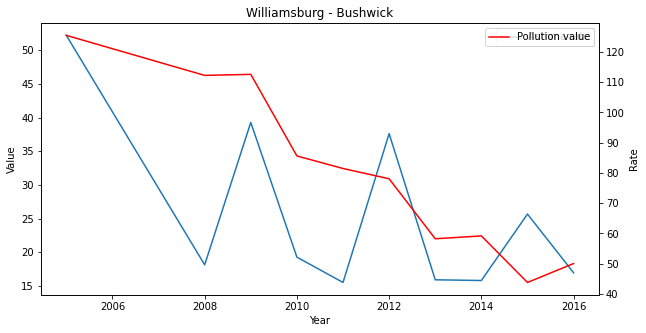

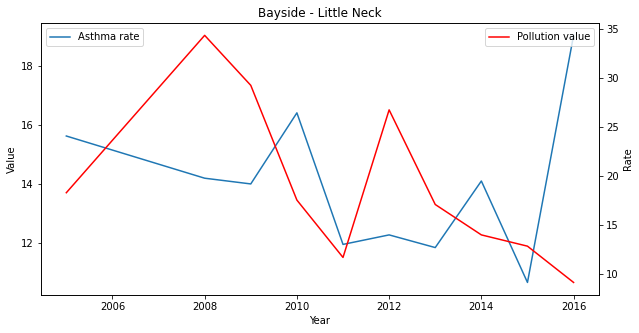

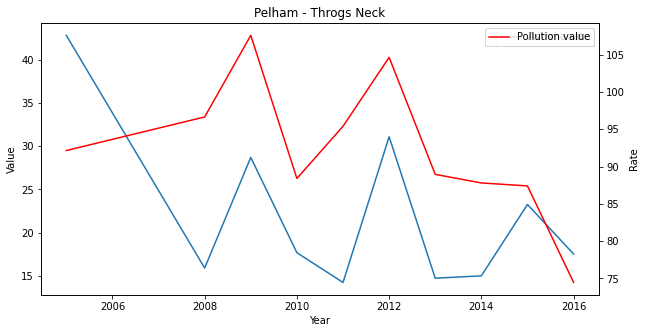

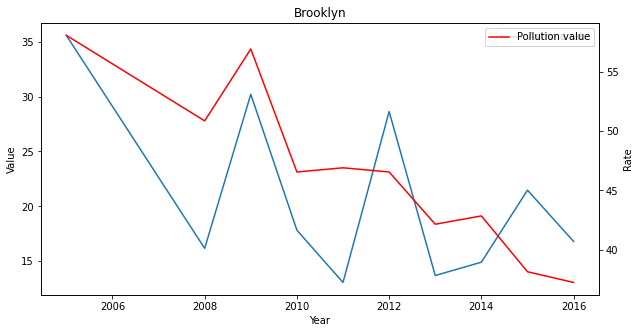

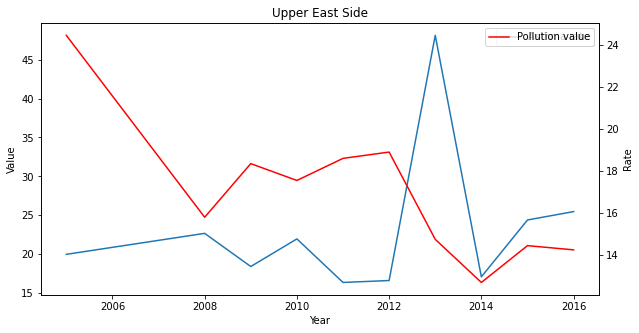

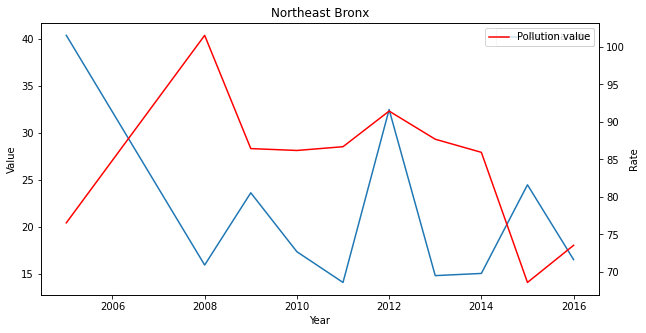

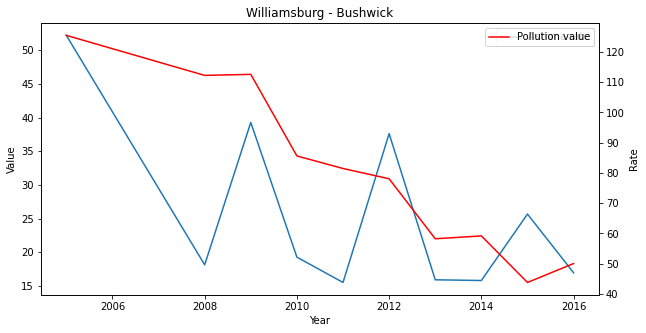

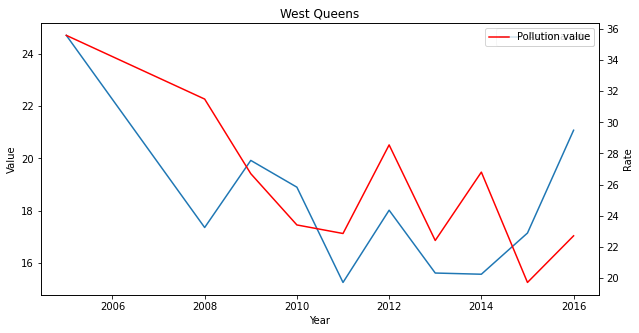

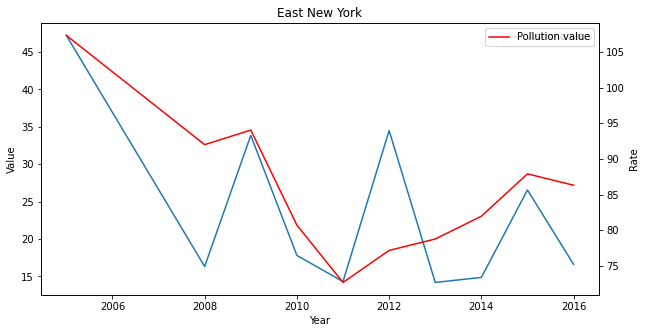

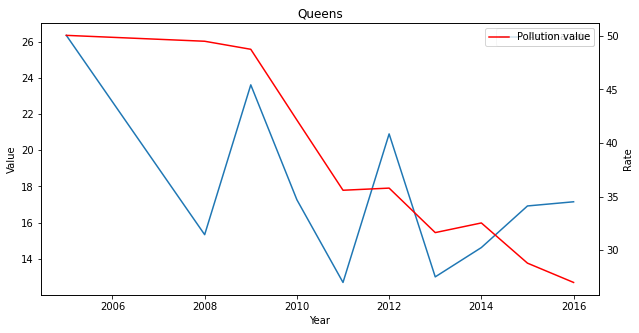

In [294]:
rand_cities = [d.Location[np.random.randint(400)] for _ in range(10)]
for city in rand_cities:
    plt.figure(figsize = (10,5))
    sns.lineplot(data = d[d.Location == city], x = "Year", y = "Value",label='Asthma rate').set_title(city)
    plt.twinx()
    sns.lineplot(data = d[d.Location == city], x = "Year", y = "Rate",label='Pollution value', color = "r")
    plt.legend()

<AxesSubplot:xlabel='Rate', ylabel='Value'>

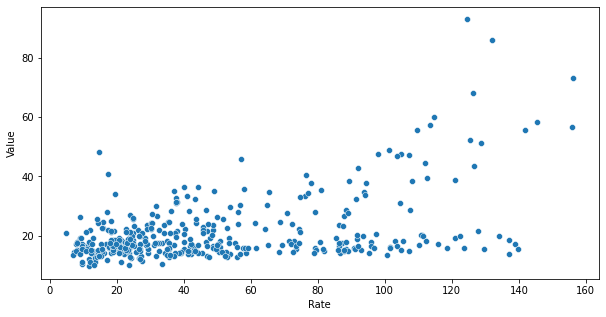

In [295]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = d["Rate"], y= d["Value"])

In [296]:
d[["Value", "Rate"]].corr()

Value      Rate
Value  1.000000  0.480521
Rate   0.480521  1.000000

In [297]:
df_hosp2_melted

Location Year and age     n  Year AgeGroup  Uhf
0                        New York City    2005_0-4y  5027  2005     0-4y    0
1                                Bronx    2005_0-4y  1791  2005     0-4y    0
2                             Brooklyn    2005_0-4y  1481  2005     0-4y    0
3                            Manhattan    2005_0-4y   597  2005     0-4y    0
4                               Queens    2005_0-4y  1026  2005     0-4y    0
...                                ...          ...   ...   ...      ...  ...
1723              Upper West Side(304)   2016_0-17y    43  2016    0-17y  304
1724  Washington Heights - Inwood(301)   2016_0-17y   210  2016    0-17y  301
1725                  West Queens(402)   2016_0-17y   199  2016    0-17y  402
1726      Williamsburg - Bushwick(211)   2016_0-17y   240  2016    0-17y  211
1727                  Willowbrook(503)   2016_0-17y    12  2016    0-17y  503

[1728 rows x 6 columns]

In [298]:
df_hosp2_melted_mean = df_hosp2_melted[["Uhf","n"]].groupby("Uhf", as_index=0).mean()
df_hosp2_melted = df_hosp2_melted[df_hosp2_melted.Uhf != 0]
df_hosp2_melted_mean.head()

Uhf            n
0    0  1837.754630
1  101    42.444444
2  102   197.277778
3  103   390.277778
4  104   352.111111

In [299]:
import folium
from folium import plugins
from folium.plugins import HeatMap

lat, lon = 40.682030, -74.046082
map_ny = folium.Map([lat, lon], zoom_start=11, tiles = "cartodbpositron")
map_ny.choropleth(
    geo_data=geojson_ny,
    name='Choropleth',
    data=df_hosp2_melted_mean,
    columns=['Uhf','n'],
    key_on="properties.UHFCODE",
    fill_color='YlGnBu',
    fill_opacity=1,
    line_opacity=0.2,
    legend_name='n',
    smooth_factor=0,
    nan_fill_color='grey',
    nan_fill_opacity=0.4,
)
map_ny

/Users/oas/Library/Python/3.8/lib/python/site-packages/folium/folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


## Timeseries choropleth of polution and asthma

In [300]:
df_hosp2_melted.head()

Location Year and age    n  Year AgeGroup  \
6                Bayside - Little Neck(404)    2005_0-4y   10  2005     0-4y   
7   Bedford Stuyvesant - Crown Heights(203)    2005_0-4y  379  2005     0-4y   
8              Bensonhurst - Bay Ridge(209)    2005_0-4y   20  2005     0-4y   
9                         Borough Park(206)    2005_0-4y   42  2005     0-4y   
10                Canarsie - Flatlands(208)    2005_0-4y  106  2005     0-4y   

    Uhf  
6   404  
7   203  
8   209  
9   206  
10  208

In [301]:
df_air.head()

UniqueID  IndicatorID                       Name  \
0    130355          639  PM2.5-Attributable Deaths   
1    130356          639  PM2.5-Attributable Deaths   
2    130357          639  PM2.5-Attributable Deaths   
3    130358          639  PM2.5-Attributable Deaths   
4    130359          639  PM2.5-Attributable Deaths   

                                           Measure         MeasureInfo  \
0  Estimated Annual Rate - Adults 30 Yrs and Older  per 100,000 adults   
1  Estimated Annual Rate - Adults 30 Yrs and Older  per 100,000 adults   
2  Estimated Annual Rate - Adults 30 Yrs and Older  per 100,000 adults   
3  Estimated Annual Rate - Adults 30 Yrs and Older  per 100,000 adults   
4  Estimated Annual Rate - Adults 30 Yrs and Older  per 100,000 adults   

  GeoTypeName  GeoJoinID             GeoPlaceName TimePeriod  StartDate  \
0       UHF42        101  Kingsbridge - Riverdale  2005-2007 2005-01-01   
1       UHF42        102          Northeast Bronx  2005-2007 2005-01-01   
2       UHF42        103       Fordham - Bronx Pk  2005-2007 2005-01-01   
3       UHF42        104     Pelham - Throgs Neck  2005-2007 2005-01-01   
4       UHF42        105         Crotona -Tremont  2005-2007 2005-01-01   

   Value  Year  Month  Day  
0  117.7  2005      1    1  
1   77.3  2005      1    1  
2   67.3  2005      1    1  
3   73.6  2005      1    1  
4   65.8  2005      1    1

In [302]:
df_air.Name.unique()

array(['PM2.5-Attributable Deaths',
       'Boiler Emissions- Total SO2 Emissions',
       'Boiler Emissions- Total PM2.5 Emissions',
       'Boiler Emissions- Total NOx Emissions',
       'Air Toxics Concentrations- Average Benzene Concentrations',
       'Air Toxics Concentrations- Average Formaldehyde Concentrations',
       'PM2.5-Attributable Asthma Emergency Department Visits',
       'PM2.5-Attributable Respiratory Hospitalizations (Adults 20 Yrs and Older)',
       'PM2.5-Attributable Cardiovascular Hospitalizations (Adults 40 Yrs and Older)',
       'O3-Attributable Cardiac and Respiratory Deaths',
       'O3-Attributable Asthma Emergency Department Visits',
       'O3-Attributable Asthma Hospitalizations',
       'Traffic Density- Annual Vehicle Miles Traveled',
       'Traffic Density- Annual Vehicle Miles Traveled for Cars',
       'Traffic Density- Annual Vehicle Miles Traveled for Trucks',
       'Sulfur Dioxide (SO2)', 'Nitrogen Dioxide (NO2)',
       'Fine Particulate M

In [303]:
from folium.plugins import TimeSliderChoropleth

In [304]:
# create dataset consisting of the inner join of df_air and df_hosp2_melted, merged on UHF and YEAR
gb_hosp = df_hosp2_melted[df_hosp2_melted.AgeGroup == "0-17y"].groupby(["Uhf", "Year"], as_index=False).mean() # get hospitalization data grouped by year and neighbourhood
gb_air = df_air[df_air.Name == "Fine Particulate Matter (PM2.5)"][["Year","Value","GeoJoinID"]].groupby(["GeoJoinID", "Year"], as_index=False).mean()

In [305]:
df_hosp.Year.unique()

array([2000, 2001, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016])

In [306]:
df_air.Year.unique()

array([2005, 2013, 2009, 2008, 2010, 2011, 2012, 2015, 2014, 2016, 2017,
       2018, 2019, 2020])

In [307]:
gb_chorotime = gb_hosp.merge(gb_air, left_on=["Year","Uhf"], right_on=["Year", "GeoJoinID"], how = "inner")

In [308]:
# rename, change dtypes and remove duplicate columns
gb_chorotime = gb_chorotime.rename(
    columns={
        "n" : "Hosp_value",
        "Value" : "Air_value",
    }
)

gb_chorotime = gb_chorotime.astype({"Year":"int", "Uhf":"int"})

gb_chorotime = gb_chorotime.drop(columns="GeoJoinID")

gb_chorotime["Hosp_value"] = gb_chorotime.Hosp_value / max(gb_chorotime.Hosp_value) # map to values between 0 and 1
gb_chorotime["Air_value"] = gb_chorotime.Air_value / max(gb_chorotime.Air_value) # --//--
gb_chorotime

Uhf  Year  Hosp_value  Air_value
0    101  2008    0.102453   0.864973
1    101  2009    0.088023   0.730143
2    101  2010    0.106782   0.819694
3    101  2011    0.093795   0.698063
4    101  2012    0.096681   0.696265
..   ...   ...         ...        ...
373  504  2012    0.054834   0.586287
374  504  2013    0.056277   0.623186
375  504  2014    0.057720   0.505583
376  504  2015    0.054834   0.476453
377  504  2016    0.051948   0.466419

[378 rows x 4 columns]

In [309]:
# create colormap for plotting polution
import branca.colormap as cm
colormap = cm.LinearColormap(vmin=0, vmax=1, colors=["lightgreen", "black"])
print(colormap(0.2))
colormap

#73bf73ff


In [310]:
# creating the style dict for the choropleth.
# it consists of a dict of dicts of dicts.
# styledict = {
#     shapefile_index : {
#         date_in_unix_time : {color:, opacity:},
#         date_in_unix_time : {color:, opacity:},
#         date_in_unix_time : {color:, opacity:}
#     }
#     shapefile_index : {
#         date_in_unix_time : {color:, opacity:},
#         date_in_unix_time : {color:, opacity:},
#         date_in_unix_time : {color:, opacity:}
#     }
# }

uhf_to_idx = {row.UHFCODE:str(idx) for idx, row in geojson_ny.iterrows()} # map uhf to index in geojson

style_dict = {}
for idx, uhf, year, hosp_value, air_value in gb_chorotime.itertuples():    
    year_epoch = str(datetime(year, 1, 1).timestamp()) # convert year to ms after epoch

    if uhf_to_idx[uhf] in style_dict: style_dict[uhf_to_idx[uhf]][year_epoch] = {"color":colormap(air_value), "opacity":hosp_value}
    else: style_dict[uhf_to_idx[uhf]] = {year_epoch: {"color":colormap(air_value),"opacity":hosp_value}}

In [311]:
uhf42shapes_converted = uhf42shapes.to_crs(epsg=4326) # convert to format compatible with timeslider choropleth

In [312]:
""" SIMPLE GEOPLOT FOR REFERENCE"""

lat, lon = 40.682030, -74.046082
map_ny = folium.Map(
    [lat, lon], zoom_start=11, tiles = "cartodbpositron",
    zoom_control=False,
    dragging=False,
    scrollWheelZoom=False
)
c = Choropleth(
    geo_data=geojson_ny,
    name='Choropleth',
    data=df_air_choro,
    columns=['GeoJoinID','Value'],
    key_on="properties.UHFCODE",
    fill_color='YlGnBu',
    fill_opacity=1,
    line_opacity=0.2,
    legend_name='Mean air polution value in ppb',
    smooth_factor=0,
    nan_fill_color='grey',
    nan_fill_opacity=0.4,
)

# Display UHF
c.geojson.add_child(
    folium.features.GeoJsonTooltip(['UHFCODE'],aliases=["UHF CODE"])
)

map_ny.add_child(c)
map_ny

In [313]:
geojson

coty_code coty_gnis_code       coty_name_long     ste_name  coty_type  \
0        29167       00758538          Polk County     Missouri     county   
1        29227       00758566         Worth County     Missouri     county   
2        30011       01688746        Carter County      Montana     county   
3        30035       01719607       Glacier County      Montana     county   
4        30059       01719600       Meagher County      Montana     county   
...        ...            ...                  ...          ...        ...   
3229     72081       01804521      Lares Municipio  Puerto Rico  municipio   
3230     72111       01804536   Peñuelas Municipio  Puerto Rico  municipio   
3231     72135       01804548   Toa Alta Municipio  Puerto Rico  municipio   
3232     72143       01804552  Vega Alta Municipio  Puerto Rico  municipio   
3233     72147       01804554    Vieques Municipio  Puerto Rico  municipio   

      year coty_area_code ste_code coty_fp_code  coty_name  \
0     2020            USA       29          167       Polk   
1     2020            USA       29          227      Worth   
2     2020            USA       30          011     Carter   
3     2020            USA       30          035    Glacier   
4     2020            USA       30          059    Meagher   
...    ...            ...      ...          ...        ...   
3229  2020            PRI       72          081      Lares   
3230  2020            PRI       72          111   Peñuelas   
3231  2020            PRI       72          135   Toa Alta   
3232  2020            PRI       72          143  Vega Alta   
3233  2020            PRI       72          147    Vieques   

                                               geometry  
0     POLYGON ((-93.18249 37.41720, -93.18159 37.458...  
1     POLYGON ((-94.59849 40.38671, -94.56014 40.386...  
2     POLYGON ((-104.88550 46.13659, -104.93921 46.1...  
3     POLYGON ((-112.19341 48.99868, -112.25859 48.9...  
4     POLYGON ((-110.28192 46.18440, -110.28197 46.2...  
...                                                 ...  
3229  POLYGON ((-66.82613 18.32338, -66.82422 18.343...  
3230  POLYGON ((-66.77412 17.91480, -66.76731 17.915...  
3231  POLYGON ((-66.25255 18.39419, -66.25498 18.390...  
3232  POLYGON ((-66.36527 18.33323, -66.36066 18.332...  
3233  POLYGON ((-65.61805 18.15418, -65.62040 18.148...  

[3234 rows x 11 columns]

In [412]:
# plot

lat, lon = 40.680795, -73.973043
map_ny = folium.Map(
    [lat, lon], zoom_start=11, tiles = "cartodbpositron",
    zoom_control=False,
    dragging=False,
    scrollWheelZoom=False,
    width=1000,
    height=1000
    
)

time_choro = TimeSliderChoropleth(
    uhf42shapes_converted.to_json(),
    style_dict
)
c = Choropleth(
    geo_data=geojson_ny,
    name='Choropleth',
    data=df_air_choro,
    columns=['GeoJoinID','Value'],
    key_on="properties.UHFCODE",
    fill_color='YlGnBu',
    #fill_opacity=1,
    line_opacity=0.2,
    #legend_name='Mean air polution value in ppb',
    smooth_factor=0,
    fill_opacity= 0,
    overlay=True,
    show=False
)

# Display UHF
c.geojson.add_child(
    folium.features.GeoJsonTooltip(['UHF_NEIGH'],aliases=["District"])
)

for key in c._children: # remove legend
    if key.startswith('color_map'):
        del(c._children[key])

map_ny.add_child(time_choro)
map_ny.add_child(c)
plt.figure(figsize=(15,15))
map_ny

<Figure size 1080x1080 with 0 Axes>

In [315]:
gb_chorotime

Uhf  Year  Hosp_value  Air_value
0    101  2008    0.102453   0.864973
1    101  2009    0.088023   0.730143
2    101  2010    0.106782   0.819694
3    101  2011    0.093795   0.698063
4    101  2012    0.096681   0.696265
..   ...   ...         ...        ...
373  504  2012    0.054834   0.586287
374  504  2013    0.056277   0.623186
375  504  2014    0.057720   0.505583
376  504  2015    0.054834   0.476453
377  504  2016    0.051948   0.466419

[378 rows x 4 columns]

In [316]:
def plot_pollution_per_district(UHF):
    plt.plot(gb_chorotime[gb_chorotime.Uhf==UHF].Year,
         gb_chorotime[gb_chorotime.Uhf==UHF].Hosp_value,label='Astha hosp')
    plt.plot(gb_chorotime[gb_chorotime.Uhf==UHF].Year,
         gb_chorotime[gb_chorotime.Uhf==UHF].Air_value,label='Air pollution')
    plt.title('district '+str(UHF));plt.legend();plt.show()

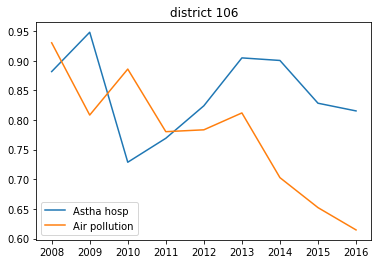

In [317]:
plot_pollution_per_district(106)

Let's study this particular case:

In [318]:
df_air[df_air.GeoJoinID==106]

UniqueID  IndicatorID  \
5        130360          639   
47       130402          640   
95       130450          641   
143      130498          642   
191      130690          646   
...         ...          ...   
15817    669821          365   
15818    669822          365   
15819    669823          365   
16000    670897          386   
16077    670974          386   

                                                    Name  \
5                              PM2.5-Attributable Deaths   
47                 Boiler Emissions- Total SO2 Emissions   
95               Boiler Emissions- Total PM2.5 Emissions   
143                Boiler Emissions- Total NOx Emissions   
191    Air Toxics Concentrations- Average Benzene Con...   
...                                                  ...   
15817                    Fine Particulate Matter (PM2.5)   
15818                    Fine Particulate Matter (PM2.5)   
15819                    Fine Particulate Matter (PM2.5)   
16000                                         Ozone (O3)   
16077                                         Ozone (O3)   

                                               Measure          MeasureInfo  \
5      Estimated Annual Rate - Adults 30 Yrs and Older   per 100,000 adults   
47                                      Number per km2               number   
95                                      Number per km2               number   
143                                     Number per km2               number   
191                       Annual Average Concentration                µg/m3   
...                                                ...                  ...   
15817                                             Mean  mcg per cubic meter   
15818                                             Mean  mcg per cubic meter   
15819                                             Mean  mcg per cubic meter   
16000                                             Mean                  ppb   
16077                                             Mean                  ppb   

      GeoTypeName  GeoJoinID                          GeoPlaceName  \
5           UHF42        106              High Bridge - Morrisania   
47          UHF42        106              High Bridge - Morrisania   
95          UHF42        106              High Bridge - Morrisania   
143         UHF42        106              High Bridge - Morrisania   
191         UHF42        106              High Bridge - Morrisania   
...           ...        ...                                   ...   
15817       UHF42        106              High Bridge - Morrisania   
15818       UHF42        106              High Bridge - Morrisania   
15819       UHF42        106              High Bridge - Morrisania   
16000          CD        106  Stuyvesant Town and Turtle Bay (CD6)   
16077       UHF42        106              High Bridge - Morrisania   

                TimePeriod  StartDate  Value  Year  Month  Day  
5                2005-2007 2005-01-01  84.80  2005      1    1  
47                    2013 2013-01-01  19.70  2013      1    1  
95                    2013 2013-01-01   2.40  2013      1    1  
143                   2013 2013-01-01  78.00  2013      1    1  
191                   2005 2005-01-01   3.00  2005      1    1  
...                    ...        ...    ...   ...    ...  ...  
15817          Summer 2020 2020-06-01   7.24  2020      6    1  
15818       Winter 2019-20 2019-12-01   7.11  2019     12    1  
15819  Annual Average 2020 2020-01-01   6.12  2020      1    1  
16000          Summer 2020 2020-06-01  28.13  2020      6    1  
16077          Summer 2020 2020-06-01  30.13  2020      6    1  

[248 rows x 14 columns]

In [319]:
np.unique(df_air[df_air.GeoJoinID==106].Name)

array(['Air Toxics Concentrations- Average Benzene Concentrations',
       'Air Toxics Concentrations- Average Formaldehyde Concentrations',
       'Boiler Emissions- Total NOx Emissions',
       'Boiler Emissions- Total PM2.5 Emissions',
       'Boiler Emissions- Total SO2 Emissions',
       'Fine Particulate Matter (PM2.5)', 'Nitrogen Dioxide (NO2)',
       'O3-Attributable Asthma Emergency Department Visits',
       'O3-Attributable Asthma Hospitalizations',
       'O3-Attributable Cardiac and Respiratory Deaths', 'Ozone (O3)',
       'PM2.5-Attributable Asthma Emergency Department Visits',
       'PM2.5-Attributable Cardiovascular Hospitalizations (Adults 40 Yrs and Older)',
       'PM2.5-Attributable Deaths',
       'PM2.5-Attributable Respiratory Hospitalizations (Adults 20 Yrs and Older)',
       'Sulfur Dioxide (SO2)',
       'Traffic Density- Annual Vehicle Miles Traveled',
       'Traffic Density- Annual Vehicle Miles Traveled for Cars',
       'Traffic Density- Annual Vehicl

In [320]:
district_106=df_air[df_air.GeoJoinID==106]
district_106=district_106.reset_index()

In [321]:
district_106[district_106.Name=='Air Toxics Concentrations- Average Benzene Concentrations']

index  UniqueID  IndicatorID  \
4      191    130690          646   
131   8487    227573          646   
132   8551    315595          646   

                                                  Name  \
4    Air Toxics Concentrations- Average Benzene Con...   
131  Air Toxics Concentrations- Average Benzene Con...   
132  Air Toxics Concentrations- Average Benzene Con...   

                          Measure MeasureInfo GeoTypeName  GeoJoinID  \
4    Annual Average Concentration       µg/m3       UHF42        106   
131  Annual Average Concentration       µg/m3          CD        106   
132  Annual Average Concentration       µg/m3       UHF42        106   

                             GeoPlaceName TimePeriod  StartDate     Value  \
4                High Bridge - Morrisania       2005 2005-01-01  3.000000   
131  Stuyvesant Town and Turtle Bay (CD6)       2011 2011-01-01  2.467445   
132              High Bridge - Morrisania       2011 2011-01-01  1.600000   

     Year  Month  Day  
4    2005      1    1  
131  2011      1    1  
132  2011      1    1

In [322]:
df_air2 = df_air[df_air.Name.isin(['Sulfur Dioxide (SO2)', 'Nitrogen Dioxide (NO2)',
       'Fine Particulate Matter (PM2.5)', 'Ozone (O3)'])]
df_air2

UniqueID  IndicatorID                  Name Measure MeasureInfo  \
1511     164854          383  Sulfur Dioxide (SO2)    Mean         ppb   
1512     164855          383  Sulfur Dioxide (SO2)    Mean         ppb   
1513     164856          383  Sulfur Dioxide (SO2)    Mean         ppb   
1514     164857          383  Sulfur Dioxide (SO2)    Mean         ppb   
1515     164858          383  Sulfur Dioxide (SO2)    Mean         ppb   
...         ...          ...                   ...     ...         ...   
16117    671118          386            Ozone (O3)    Mean         ppb   
16118    671119          386            Ozone (O3)    Mean         ppb   
16119    671120          386            Ozone (O3)    Mean         ppb   
16120    671121          386            Ozone (O3)    Mean         ppb   
16121    671122          386            Ozone (O3)    Mean         ppb   

      GeoTypeName  GeoJoinID                            GeoPlaceName  \
1511           CD        101                Financial District (CD1)   
1512           CD        102        Greenwich Village and Soho (CD2)   
1513           CD        103     Lower East Side and Chinatown (CD3)   
1514           CD        104               Clinton and Chelsea (CD4)   
1515           CD        105                           Midtown (CD5)   
...           ...        ...                                     ...   
16117          CD        306    Park Slope and Carroll Gardens (CD6)   
16118          CD        305   East New York and Starrett City (CD5)   
16119          CD        304                          Bushwick (CD4)   
16120          CD        303                Bedford Stuyvesant (CD3)   
16121          CD        302  Fort Greene and Brooklyn Heights (CD2)   

           TimePeriod  StartDate  Value  Year  Month  Day  
1511   Winter 2008-09 2008-12-01   4.79  2008     12    1  
1512   Winter 2008-09 2008-12-01   8.68  2008     12    1  
1513   Winter 2008-09 2008-12-01   7.01  2008     12    1  
1514   Winter 2008-09 2008-12-01   7.31  2008     12    1  
1515   Winter 2008-09 2008-12-01  10.29  2008     12    1  
...               ...        ...    ...   ...    ...  ...  
16117     Summer 2020 2020-06-01  28.70  2020      6    1  
16118     Summer 2020 2020-06-01  29.56  2020      6    1  
16119     Summer 2020 2020-06-01  29.65  2020      6    1  
16120     Summer 2020 2020-06-01  29.28  2020      6    1  
16121     Summer 2020 2020-06-01  28.93  2020      6    1  

[12972 rows x 14 columns]

In [323]:
df_air2 = df_air2[df_air2.GeoTypeName == "UHF42"]
df_air2.Name = df_air2.Name.apply(lambda name : re.search("\((.*?)\)", name).group(1))
df_air2


<ipython-input-323-5d8673cf9c99>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_air2.Name = df_air2.Name.apply(lambda name : re.search("\((.*?)\)", name).group(1))


UniqueID  IndicatorID Name Measure MeasureInfo GeoTypeName  GeoJoinID  \
4766     174619          383  SO2    Mean         ppb       UHF42        101   
4767     174620          383  SO2    Mean         ppb       UHF42        102   
4768     174621          383  SO2    Mean         ppb       UHF42        103   
4769     174622          383  SO2    Mean         ppb       UHF42        104   
4770     174623          383  SO2    Mean         ppb       UHF42        105   
...         ...          ...  ...     ...         ...         ...        ...   
16078    670975          386   O3    Mean         ppb       UHF42        105   
16079    670976          386   O3    Mean         ppb       UHF42        104   
16080    670977          386   O3    Mean         ppb       UHF42        103   
16081    670978          386   O3    Mean         ppb       UHF42        102   
16082    670979          386   O3    Mean         ppb       UHF42        101   

                  GeoPlaceName      TimePeriod  StartDate  Value  Year  Month  \
4766   Kingsbridge - Riverdale  Winter 2008-09 2008-12-01   6.62  2008     12   
4767           Northeast Bronx  Winter 2008-09 2008-12-01   5.38  2008     12   
4768        Fordham - Bronx Pk  Winter 2008-09 2008-12-01   9.48  2008     12   
4769      Pelham - Throgs Neck  Winter 2008-09 2008-12-01   5.15  2008     12   
4770          Crotona -Tremont  Winter 2008-09 2008-12-01   9.36  2008     12   
...                        ...             ...        ...    ...   ...    ...   
16078         Crotona -Tremont     Summer 2020 2020-06-01  30.15  2020      6   
16079     Pelham - Throgs Neck     Summer 2020 2020-06-01  32.05  2020      6   
16080       Fordham - Bronx Pk     Summer 2020 2020-06-01  30.17  2020      6   
16081          Northeast Bronx     Summer 2020 2020-06-01  30.85  2020      6   
16082  Kingsbridge - Riverdale     Summer 2020 2020-06-01  28.49  2020      6   

       Day  
4766     1  
4767     1  
4768     1  
4769     1  
4770     1  
...    ...  
16078    1  
16079    1  
16080    1  
16081    1  
16082    1  

[3864 rows x 14 columns]

In [324]:
df_air2.Name.unique()

array(['SO2', 'NO2', 'PM2.5', 'O3'], dtype=object)

In [325]:
df_air2[df_air2.Name == "SO2"]

UniqueID  IndicatorID Name Measure MeasureInfo GeoTypeName  GeoJoinID  \
4766     174619          383  SO2    Mean         ppb       UHF42        101   
4767     174620          383  SO2    Mean         ppb       UHF42        102   
4768     174621          383  SO2    Mean         ppb       UHF42        103   
4769     174622          383  SO2    Mean         ppb       UHF42        104   
4770     174623          383  SO2    Mean         ppb       UHF42        105   
...         ...          ...  ...     ...         ...         ...        ...   
10128    405263          383  SO2    Mean         ppb       UHF42        410   
10129    405264          383  SO2    Mean         ppb       UHF42        501   
10130    405265          383  SO2    Mean         ppb       UHF42        502   
10131    405266          383  SO2    Mean         ppb       UHF42        503   
10132    405267          383  SO2    Mean         ppb       UHF42        504   

                    GeoPlaceName      TimePeriod  StartDate  Value  Year  \
4766     Kingsbridge - Riverdale  Winter 2008-09 2008-12-01   6.62  2008   
4767             Northeast Bronx  Winter 2008-09 2008-12-01   5.38  2008   
4768          Fordham - Bronx Pk  Winter 2008-09 2008-12-01   9.48  2008   
4769        Pelham - Throgs Neck  Winter 2008-09 2008-12-01   5.15  2008   
4770            Crotona -Tremont  Winter 2008-09 2008-12-01   9.36  2008   
...                          ...             ...        ...    ...   ...   
10128                  Rockaways  Winter 2015-16 2015-12-01   0.20  2015   
10129              Port Richmond  Winter 2015-16 2015-12-01   0.12  2015   
10130     Stapleton - St. George  Winter 2015-16 2015-12-01   0.13  2015   
10131                Willowbrook  Winter 2015-16 2015-12-01   0.12  2015   
10132  South Beach - Tottenville  Winter 2015-16 2015-12-01   0.11  2015   

       Month  Day  
4766      12    1  
4767      12    1  
4768      12    1  
4769      12    1  
4770      12    1  
...      ...  ...  
10128     12    1  
10129     12    1  
10130     12    1  
10131     12    1  
10132     12    1  

[336 rows x 14 columns]

In [326]:
df_air2[df_air2.Name == "O3"].TimePeriod.unique()

array(['Summer 2009', 'Summer 2010', 'Summer 2011', 'Summer 2012',
       'Summer 2013', 'Summer 2014', 'Summer 2015', 'Summer 2016',
       'Summer 2017', 'Summer 2018', 'Summer 2019', 'Summer 2020'],
      dtype=object)

In [327]:
df_air2[df_air2.Name == "SO2"].TimePeriod.unique()

array(['Winter 2008-09', 'Winter 2009-10', 'Winter 2010-11',
       'Winter 2011-12', 'Winter 2012-13', 'Winter 2013-14',
       'Winter 2014-15', 'Winter 2015-16'], dtype=object)

In [328]:
df_air2[df_air2.Name == "PM2.5"].TimePeriod.unique()

array(['Winter 2008-09', 'Winter 2009-10', 'Winter 2010-11',
       'Winter 2011-12', 'Winter 2012-13', 'Summer 2009', 'Summer 2010',
       'Summer 2011', 'Summer 2012', 'Summer 2013', 'Annual Average 2009',
       'Annual Average 2010', 'Annual Average 2011',
       'Annual Average 2012', 'Annual Average 2013', 'Winter 2013-14',
       'Summer 2014', 'Annual Average 2014', 'Annual Average 2015',
       'Summer 2015', 'Winter 2014-15', 'Winter 2015-16', 'Summer 2016',
       'Annual Average 2016', 'Summer 2017', 'Annual Average 2017',
       'Winter 2016-17', 'Annual Average 2018', 'Summer 2018',
       'Winter 2017-18', 'Annual Average 2019', 'Summer 2019',
       'Winter 2018-19', 'Summer 2020', 'Winter 2019-20',
       'Annual Average 2020'], dtype=object)

In [329]:
df_air2[df_air2.Name == "NO2"].TimePeriod.unique()

array(['Winter 2008-09', 'Winter 2009-10', 'Winter 2010-11',
       'Winter 2011-12', 'Winter 2012-13', 'Summer 2009', 'Summer 2010',
       'Summer 2011', 'Summer 2012', 'Summer 2013', 'Annual Average 2009',
       'Annual Average 2010', 'Annual Average 2011',
       'Annual Average 2012', 'Annual Average 2013', 'Winter 2013-14',
       'Summer 2014', 'Annual Average 2014', 'Annual Average 2015',
       'Summer 2015', 'Winter 2014-15', 'Winter 2015-16', 'Summer 2016',
       'Annual Average 2016', 'Summer 2017', 'Annual Average 2017',
       'Winter 2016-17', 'Annual Average 2018', 'Summer 2018',
       'Winter 2017-18', 'Annual Average 2019', 'Summer 2019',
       'Winter 2018-19', 'Annual Average 2020', 'Winter 2019-20',
       'Summer 2020'], dtype=object)

In [330]:
df_air2[df_air2.Name == "Fine Particulate Matter (PM2.5)"].TimePeriod.str[:14] == "Annual Average"

Series([], Name: TimePeriod, dtype: bool)

### Simple machine learning model to predict number of Asthma Hosp

In [331]:
var=['Sulfur Dioxide (SO2)','Ozone (O3)','Nitrogen Dioxide (NO2)','Fine Particulate Matter (PM2.5)']
age_groups=['0-4y','5-17y']
districts=np.unique(df_hosp2_melted.Uhf)

machine_df=[]
for district_num in districts:
    district_data=df_air[df_air.GeoJoinID==district_num]
    district_data=district_data[district_data.GeoTypeName=='UHF42']
    district_data=district_data.reset_index()
    asthma_data=df_hosp2_melted[df_hosp2_melted.Uhf==district_num]
    
    for year in range(2009,2017):
        for age_group in age_groups:
            SO2=float(district_data[district_data.Name==var[0]][district_data[district_data.Name==var[0]].
                                              TimePeriod=='Winter '+str(year-1)+'-'+str(year)[-2:]].Value)
            O3=float(district_data[district_data.Name==var[1]][district_data[district_data.Name==var[1]].
                                              TimePeriod=='Summer '+str(year)].Value)
            NO2=float(district_data[district_data.Name==var[2]][district_data[district_data.Name==var[2]].
                                              TimePeriod=='Annual Average '+str(year)].Value)
            PM2_5=float(district_data[district_data.Name==var[3]][district_data[district_data.Name==var[3]].
                                              TimePeriod=='Annual Average '+str(year)].Value)
            asthma_value=int(asthma_data[asthma_data.Year==year][asthma_data[asthma_data.Year==year].
                                                             AgeGroup==age_group].n)
            row_el=[year,district_num,age_group,NO2,PM2_5,O3,SO2,asthma_value]
            machine_df.append(row_el)
            
machine_df=pd.DataFrame(machine_df,columns=['year','district','age_group','NO2','PM2_5','O3','SO2','asthma_hosp'])
sorted_df=machine_df.sort_values(by=['year','district'])

# delete those rows in which asthma hosp are equal to 0 TODO: why exactly?
#sorted_df=sorted_df[sorted_df.asthma_hosp!=0]
sorted_df=sorted_df.reset_index().iloc[:,1:]
sorted_df

year  district age_group    NO2  PM2_5     O3   SO2  asthma_hosp
0    2009       101      0-4y  23.20  11.03  23.67  6.62           30
1    2009       101     5-17y  23.20  11.03  23.67  6.62           31
2    2009       102      0-4y  22.39  10.68  26.82  5.38          155
3    2009       102     5-17y  22.39  10.68  26.82  5.38          127
4    2009       103      0-4y  24.82  11.10  24.47  9.48          349
..    ...       ...       ...    ...    ...    ...   ...          ...
667  2016       502     5-17y  14.93   6.80  34.18  0.13           31
668  2016       503      0-4y  14.11   7.10  34.68  0.12           12
669  2016       503     5-17y  14.11   7.10  34.68  0.12            0
670  2016       504      0-4y  11.52   6.59  36.17  0.11           24
671  2016       504     5-17y  11.52   6.59  36.17  0.11           12

[672 rows x 8 columns]

In [332]:
len(sorted_df.district.unique())

42

Let's treat district and age group with one-hot-encoding:

## Olivers code starts here

In [333]:
df_air2["TimePeriodType"] = df_air2.TimePeriod.apply(lambda val : re.search("(.*?) 2", val).group(1))

<ipython-input-333-39e8cf64e958>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_air2["TimePeriodType"] = df_air2.TimePeriod.apply(lambda val : re.search("(.*?) 2", val).group(1))


In [334]:
# it is clear that there is quite a difference in the measured values in winter and summer periods. We therefore use the average
df_air2[df_air2.Name == "NO2"][["TimePeriodType", "Value", "Year"]].groupby(["Year", "TimePeriodType"]).mean()

Value
Year TimePeriodType           
2008 Annual Average  25.825476
     Winter          30.886667
2009 Annual Average  23.813810
     Summer          22.185238
     Winter          26.977619
2010 Annual Average  24.243095
     Summer          20.558810
     Winter          30.254048
2011 Annual Average  22.129286
     Summer          20.045714
     Winter          24.748810
2012 Annual Average  21.390476
     Summer          18.472619
     Winter          25.824286
2013 Annual Average  21.065714
     Summer          17.778333
     Winter          28.058810
2014 Summer          16.321667
     Winter          25.259286
2015 Annual Average  19.956190
     Summer          15.796190
     Winter          23.732381
2016 Summer          15.291667
     Winter          25.838571
2017 Annual Average  19.720476
     Summer          15.511190
     Winter          24.771667
2018 Annual Average  18.879286
     Summer          14.366190
     Winter          22.158095
2019 Annual Average  17.397619
     Summer          14.851190
     Winter          25.070714
2020 Annual Average  16.818333
     Summer          12.165952

In [335]:
# we split them and get the essentials and use average values for PM2.5 and NO2
df_air_SO2 = df_air2[df_air2.Name == "SO2"][["Name", "GeoJoinID", "Year", "Value"]]
df_air_O3 = df_air2[df_air2.Name == "O3"][["Name", "GeoJoinID", "Year", "Value"]]
df_air_NO2 = df_air2[(df_air2.Name == "NO2") & (df_air2.TimePeriodType == "Annual Average")][["Name", "GeoJoinID", "Year", "Value"]]
df_air_PM2_5 = df_air2[(df_air2.Name == "PM2.5") & (df_air2.TimePeriodType == "Annual Average")][["Name", "GeoJoinID", "Year", "Value"]]


In [336]:
# concat the different air polution values
df_air_ml = pd.concat([df_air_SO2, df_air_O3, df_air_NO2, df_air_PM2_5])
df_air_ml = df_air_ml.rename(
    columns = {
        "Name":"Measure",
        "GeoJoinID":"Uhf",
    }
)
df_air_ml

Measure  Uhf  Year  Value
4766      SO2  101  2008   6.62
4767      SO2  102  2008   5.38
4768      SO2  103  2008   9.48
4769      SO2  104  2008   5.15
4770      SO2  105  2008   9.36
...       ...  ...   ...    ...
15822   PM2.5  105  2020   6.28
15825   PM2.5  104  2020   6.12
15828   PM2.5  103  2020   6.00
15831   PM2.5  102  2020   5.95
15834   PM2.5  101  2020   5.89

[1848 rows x 4 columns]

In [337]:
df_air_ml.groupby(["Uhf","Year"], as_index=False).agg(lambda x: list(x))[:10]

Uhf  Year                            Measure  \
0  101  2008                  [SO2, NO2, PM2.5]   
1  101  2009              [SO2, O3, NO2, PM2.5]   
2  101  2010              [SO2, O3, NO2, PM2.5]   
3  101  2011              [SO2, O3, NO2, PM2.5]   
4  101  2012              [SO2, O3, NO2, PM2.5]   
5  101  2013              [SO2, O3, NO2, PM2.5]   
6  101  2014                          [SO2, O3]   
7  101  2015  [SO2, O3, NO2, NO2, PM2.5, PM2.5]   
8  101  2016                               [O3]   
9  101  2017                   [O3, NO2, PM2.5]   

                                   Value  
0                    [6.62, 23.2, 11.03]  
1            [4.16, 23.67, 20.13, 10.09]  
2            [5.31, 31.91, 20.79, 10.65]  
3             [3.71, 31.24, 19.05, 9.27]  
4             [2.23, 33.72, 18.23, 8.88]  
5               [1.71, 30.37, 17.1, 9.0]  
6                           [1.0, 30.45]  
7  [0.3, 28.72, 17.82, 16.04, 9.17, 7.5]  
8                                [32.46]  
9                   [27.53, 17.28, 7.41]

In [338]:
np.argmax(df_air_ml.groupby(["Uhf","Year"], as_index=False).agg(lambda x: list(x))["Value"].apply(lambda x: len(x)))
df_air_ml.groupby(["Uhf","Year"], as_index=False).agg(lambda x: list(x))["Value"][:10]

0                      [6.62, 23.2, 11.03]
1              [4.16, 23.67, 20.13, 10.09]
2              [5.31, 31.91, 20.79, 10.65]
3               [3.71, 31.24, 19.05, 9.27]
4               [2.23, 33.72, 18.23, 8.88]
5                 [1.71, 30.37, 17.1, 9.0]
6                             [1.0, 30.45]
7    [0.3, 28.72, 17.82, 16.04, 9.17, 7.5]
8                                  [32.46]
9                     [27.53, 17.28, 7.41]
Name: Value, dtype: object

In [339]:
df_hosp_ml = df_hosp2_melted[["n","Year","AgeGroup","Uhf"]].rename(columns = {"n":"Hosps"})
df_hosp_ml

Hosps  Year AgeGroup  Uhf
6        10  2005     0-4y  404
7       379  2005     0-4y  203
8        20  2005     0-4y  209
9        42  2005     0-4y  206
10      106  2005     0-4y  208
...     ...   ...      ...  ...
1723     43  2016    0-17y  304
1724    210  2016    0-17y  301
1725    199  2016    0-17y  402
1726    240  2016    0-17y  211
1727     12  2016    0-17y  503

[1512 rows x 4 columns]

In [340]:
df_ml = df_hosp_ml.merge(df_air_ml, left_on=["Year","Uhf"], right_on=["Year","Uhf"])
df_ml

Hosps  Year AgeGroup  Uhf Measure  Value
0        25  2008     0-4y  404     SO2   3.69
1        25  2008     0-4y  404     NO2  20.05
2        25  2008     0-4y  404   PM2.5   9.72
3        10  2008    5-17y  404     SO2   3.69
4        10  2008    5-17y  404     NO2  20.05
...     ...   ...      ...  ...     ...    ...
4027    126  2016    5-17y  211      O3  32.99
4028    240  2016    0-17y  211      O3  32.99
4029     12  2016     0-4y  503      O3  34.68
4030      0  2016    5-17y  503      O3  34.68
4031     12  2016    0-17y  503      O3  34.68

[4032 rows x 6 columns]

In [341]:
# Olivers onehot and machine learning:
df_hosp_ml = sorted_df.copy()
#df_hosp_ml = df_hosp_ml.drop(columns="Boroughs")

In [342]:
# one hot encode
df_hosp_ml = df_hosp_ml.merge(pd.get_dummies(df_hosp_ml.age_group), left_index=True, right_index=True).drop(columns=["age_group"])
df_hosp_ml

year  district    NO2  PM2_5     O3   SO2  asthma_hosp  0-4y  5-17y
0    2009       101  23.20  11.03  23.67  6.62           30     1      0
1    2009       101  23.20  11.03  23.67  6.62           31     0      1
2    2009       102  22.39  10.68  26.82  5.38          155     1      0
3    2009       102  22.39  10.68  26.82  5.38          127     0      1
4    2009       103  24.82  11.10  24.47  9.48          349     1      0
..    ...       ...    ...    ...    ...   ...          ...   ...    ...
667  2016       502  14.93   6.80  34.18  0.13           31     0      1
668  2016       503  14.11   7.10  34.68  0.12           12     1      0
669  2016       503  14.11   7.10  34.68  0.12            0     0      1
670  2016       504  11.52   6.59  36.17  0.11           24     1      0
671  2016       504  11.52   6.59  36.17  0.11           12     0      1

[672 rows x 9 columns]

In [343]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


X = df_hosp_ml.drop(columns="asthma_hosp")
y = df_hosp_ml.asthma_hosp

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3)

In [344]:
from sklearn.metrics import explained_variance_score
rf = RandomForestRegressor()
rf.fit(Xtrain, ytrain)
ypred = rf.predict(Xtest)
explained_variance_score(ytest, ypred)


0.9447229709646815

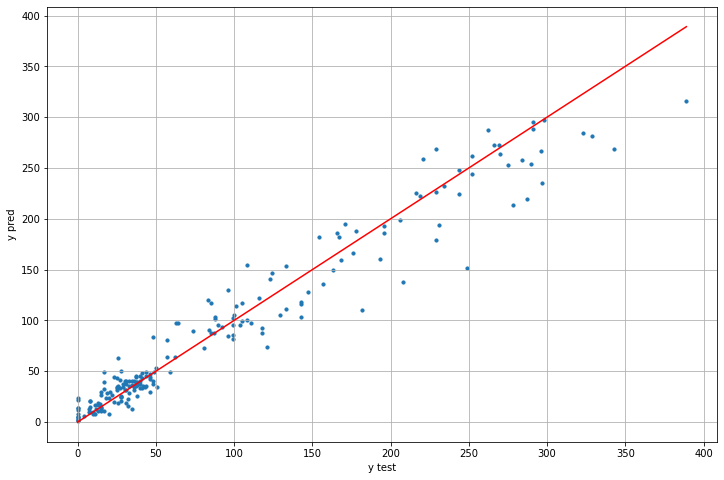

In [345]:
plt.figure(figsize=(12,8))
# plt.scatter(np.sort(y_test),np.sort(ypred),s=1)
plt.scatter(ytest,ypred,s=10)
plt.xlabel('y test'); plt.ylabel('y pred')
plt.plot(np.linspace(0,1.1),np.linspace(0,1.1),'r')
plt.plot(np.linspace(0,max(ytest)),np.linspace(0,max(ytest)),'r')
plt.grid()
plt.show()

<AxesSubplot:>

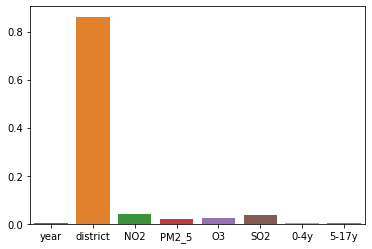

In [346]:
sns.barplot(y=rf.feature_importances_, x=Xtrain.columns)

In [347]:
temp1 = np.delete(rf.feature_importances_,1)
temp2 = Xtrain.columns.drop("district")

<AxesSubplot:>

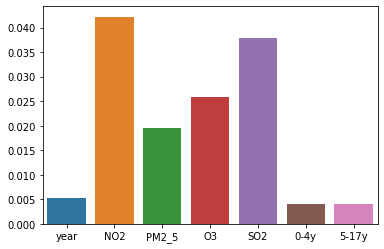

In [348]:
sns.barplot(y=temp1, x=temp2)

# TODO: train forecasting model and predict

<AxesSubplot:>

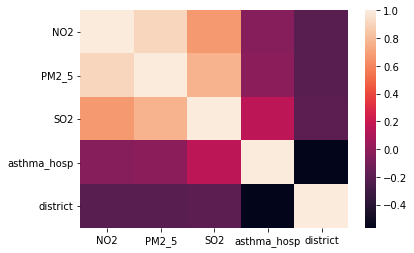

In [349]:
corr = df_hosp_ml[["NO2","PM2_5","SO2","asthma_hosp","district"]].corr()

sns.heatmap(corr,)

<AxesSubplot:xlabel='O3', ylabel='asthma_hosp'>

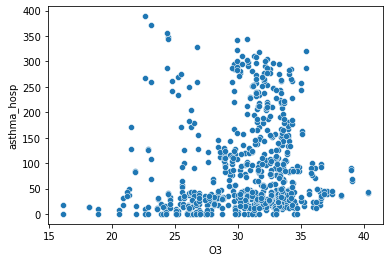

In [350]:
sns.scatterplot(data=df_hosp_ml, x = "O3", y = "asthma_hosp",)

In [351]:
# # plot random forests prediction for each district. Quite a large thing

# for district in df_hosp_ml.district.unique(): # for each district
#     Xtest_district = Xtest[Xtest.district == district]
#     ytest_district = ytest.loc[Xtest_district.index]
#     ypred_district = rf.predict(Xtest_district)
#     print(district, explained_variance_score(ytest_district, ypred_district))
#     # plot
#     plt.figure(figsize=(8,4))
#     plt.scatter(ytest_district,ypred_district,s=10)
#     plt.xlabel('y test'); plt.ylabel('y pred')
#     plt.plot(np.linspace(0,1.1),np.linspace(0,1.1),'r')
#     plt.plot(np.linspace(0,max(ytest_district)),np.linspace(0,max(ytest_district)),'r')
#     plt.grid()
#     plt.show()


## Linear regression and predictions

In [352]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(with_mean=True), LinearRegression())
model.fit(X,y)
model.score(X,y)

0.40986379926565975

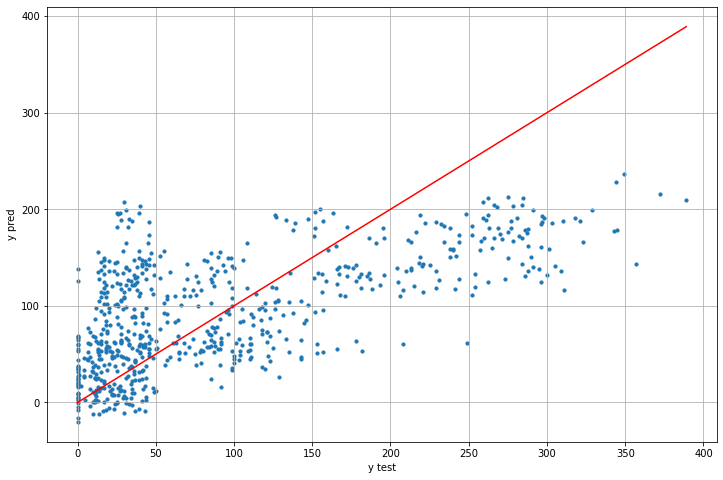

In [353]:
ypred = model.predict(X)

plt.figure(figsize=(12,8))
# plt.scatter(np.sort(y_test),np.sort(ypred),s=1)
plt.scatter(y,ypred,s=10)
plt.xlabel('y test'); plt.ylabel('y pred')
plt.plot(np.linspace(0,1.1),np.linspace(0,1.1),'r')
plt.plot(np.linspace(0,max(y)),np.linspace(0,max(y)),'r')
plt.grid()
plt.show()

In [354]:
df_hosp2_melted

Location Year and age    n  Year  \
6                  Bayside - Little Neck(404)    2005_0-4y   10  2005   
7     Bedford Stuyvesant - Crown Heights(203)    2005_0-4y  379  2005   
8                Bensonhurst - Bay Ridge(209)    2005_0-4y   20  2005   
9                           Borough Park(206)    2005_0-4y   42  2005   
10                  Canarsie - Flatlands(208)    2005_0-4y  106  2005   
...                                       ...          ...  ...   ...   
1723                     Upper West Side(304)   2016_0-17y   43  2016   
1724         Washington Heights - Inwood(301)   2016_0-17y  210  2016   
1725                         West Queens(402)   2016_0-17y  199  2016   
1726             Williamsburg - Bushwick(211)   2016_0-17y  240  2016   
1727                         Willowbrook(503)   2016_0-17y   12  2016   

     AgeGroup  Uhf  
6        0-4y  404  
7        0-4y  203  
8        0-4y  209  
9        0-4y  206  
10       0-4y  208  
...       ...  ...  
1723    0-17y  304  
1724    0-17y  301  
1725    0-17y  402  
1726    0-17y  211  
1727    0-17y  503  

[1512 rows x 6 columns]

<AxesSubplot:xlabel='Year', ylabel='n'>

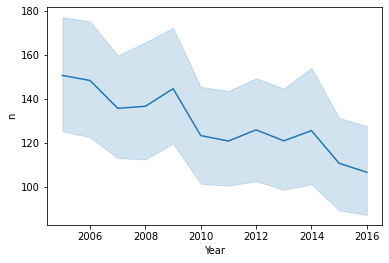

In [355]:
sns.lineplot(data=df_hosp2_melted, x = "Year", y = "n")

In [356]:
sample = pd.DataFrame({
    "year" : [2030]*10,
    "district" : [106]*10,
    "NO2" : list(np.linspace(0,40,10)),
    "PM2_5" : list(np.linspace(0,10,10)),
    "O3" : list(np.linspace(0,30,10)),
    "SO2" : list(np.linspace(0,1,10)),
    "0-4y" : [0]*10,
    "5-17y" : [1]*10,
})

rf.predict(sample)

array([202.9 , 202.9 , 214.37, 226.49, 231.81, 223.54, 211.09, 213.4 ,
       214.7 , 213.68])

In [357]:
sample = pd.DataFrame({
    "year" : range(2020,2070,5),
    "district" : [106]*10,
    "NO2" : [40]*10,
    "PM2_5" : [10]*10,
    "O3" : [30]*10,
    "SO2" : [1]*10,
    "0-4y" : [0]*10,
    "5-17y" : [1]*10,
})

rf.predict(sample)

array([213.68, 213.68, 213.68, 213.68, 213.68, 213.68, 213.68, 213.68,
       213.68, 213.68])

In [358]:
sample = pd.DataFrame({
    "year" : [0],
    "district" : [116],
    "NO2" : [0],
    "PM2_5" : [0],
    "O3" : [0],
    "SO2" : [0],
    "0-4y" : [0],
    "5-17y" : [0],
})

rf.predict(sample)

array([194.61])

In [359]:
df_hosp2_melted

Location Year and age    n  Year  \
6                  Bayside - Little Neck(404)    2005_0-4y   10  2005   
7     Bedford Stuyvesant - Crown Heights(203)    2005_0-4y  379  2005   
8                Bensonhurst - Bay Ridge(209)    2005_0-4y   20  2005   
9                           Borough Park(206)    2005_0-4y   42  2005   
10                  Canarsie - Flatlands(208)    2005_0-4y  106  2005   
...                                       ...          ...  ...   ...   
1723                     Upper West Side(304)   2016_0-17y   43  2016   
1724         Washington Heights - Inwood(301)   2016_0-17y  210  2016   
1725                         West Queens(402)   2016_0-17y  199  2016   
1726             Williamsburg - Bushwick(211)   2016_0-17y  240  2016   
1727                         Willowbrook(503)   2016_0-17y   12  2016   

     AgeGroup  Uhf  
6        0-4y  404  
7        0-4y  203  
8        0-4y  209  
9        0-4y  206  
10       0-4y  208  
...       ...  ...  
1723    0-17y  304  
1724    0-17y  301  
1725    0-17y  402  
1726    0-17y  211  
1727    0-17y  503  

[1512 rows x 6 columns]

In [360]:
# train small model

from sklearn.metrics import explained_variance_score
small_rf = RandomForestRegressor(100, max_depth=3)
small_rf.fit(Xtrain, ytrain)
ypred = small_rf.predict(Xtest)
explained_variance_score(ytest, ypred)


0.6922055893126005

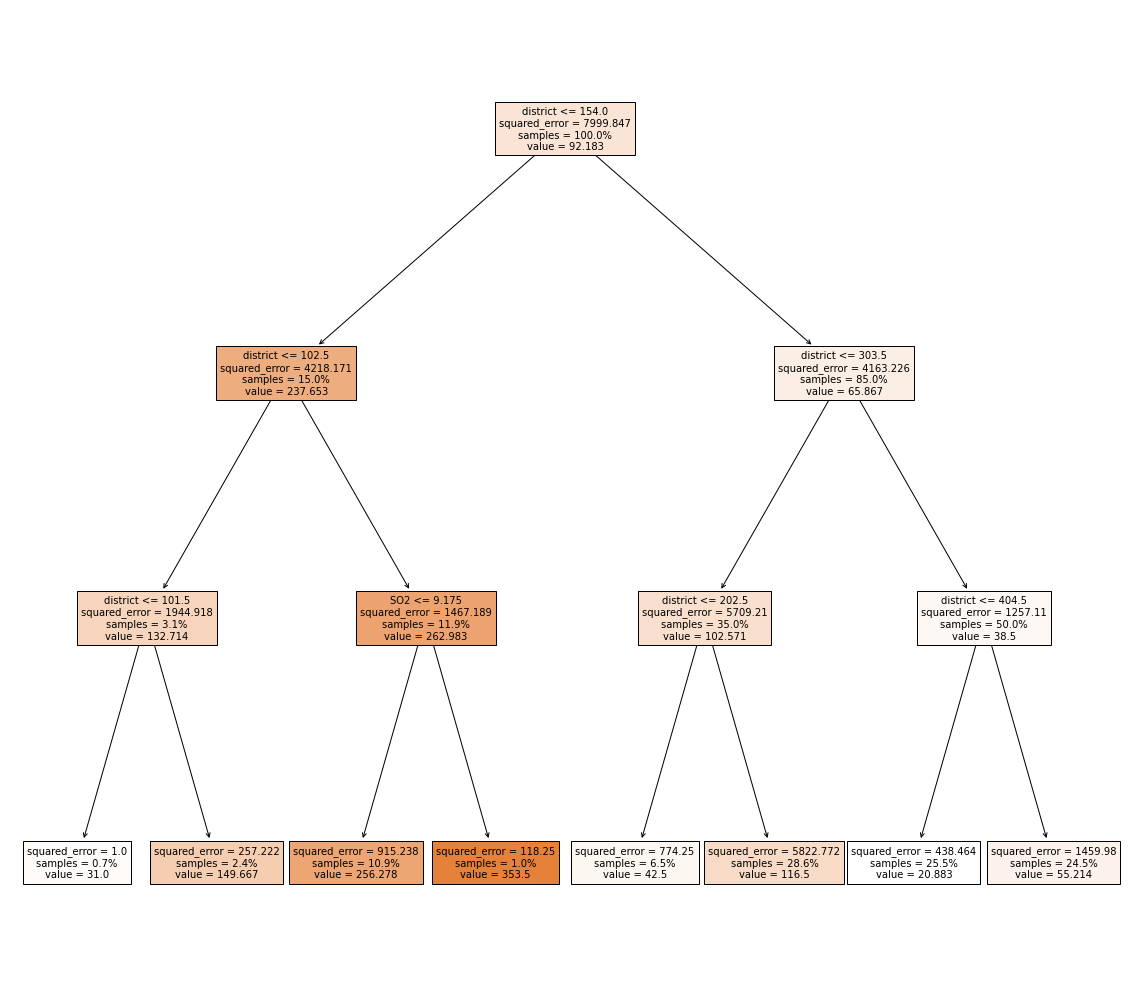

In [361]:
# extract small tree from model
from sklearn.tree import plot_tree

small_tree = small_rf.estimators_[0]
fig = plt.figure(figsize=(20,18))
_ = plot_tree(small_tree,
                feature_names=Xtrain.columns,  
                class_names=["Negative","Positive"],
                filled=True,
                proportion=True)

In [362]:
sample = pd.DataFrame({
    "year" : [0],
    "district" : [116],
    "NO2" : [0],
    "PM2_5" : [0],
    "O3" : [0],
    "SO2" : [0],
    "0-4y" : [0],
    "5-17y" : [0],
})

small_rf.predict(sample)

array([225.28528029])

In [363]:
##### NEURAL ######

In [364]:
df_hosp_ml_norm=(df_hosp_ml-df_hosp_ml.mean())/df_hosp_ml.std()
df_hosp_ml_norm

year  district       NO2     PM2_5        O3       SO2  asthma_hosp  \
0   -1.526388 -1.521473  0.169222  0.971245 -1.872111  1.710257    -0.677620   
1   -1.526388 -1.521473  0.169222  0.971245 -1.872111  1.710257    -0.666647   
2   -1.526388 -1.513356  0.017339  0.733042 -1.027938  1.182653     0.694014   
3   -1.526388 -1.513356  0.017339  0.733042 -1.027938  1.182653     0.386768   
4   -1.526388 -1.505238  0.472987  1.018886 -1.657718  2.927152     2.822790   
..        ...       ...       ...       ...       ...       ...          ...   
667  1.526388  1.733691 -1.381481 -1.907611  0.944478 -1.051157    -0.666647   
668  1.526388  1.741809 -1.535239 -1.703437  1.078474 -1.055412    -0.875135   
669  1.526388  1.741809 -1.535239 -1.703437  1.078474 -1.055412    -1.006812   
670  1.526388  1.749926 -2.020888 -2.050533  1.477781 -1.059667    -0.743458   
671  1.526388  1.749926 -2.020888 -2.050533  1.477781 -1.059667    -0.875135   

         0-4y     5-17y  
0    0.999256 -0.999256  
1   -0.999256  0.999256  
2    0.999256 -0.999256  
3   -0.999256  0.999256  
4    0.999256 -0.999256  
..        ...       ...  
667 -0.999256  0.999256  
668  0.999256 -0.999256  
669 -0.999256  0.999256  
670  0.999256 -0.999256  
671 -0.999256  0.999256  

[672 rows x 9 columns]

In [365]:
X_norm = df_hosp_ml_norm.drop(columns="asthma_hosp")
y_norm = df_hosp_ml_norm.asthma_hosp

Xtrain, Xtest, ytrain, ytest = train_test_split(X_norm, y_norm, test_size = 0.2)

In [366]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(hidden_layer_sizes=[200, 150, 25], max_iter=1000, solver = "adam", batch_size=100, early_stopping=True, validation_fraction=0.1)
nn.fit(Xtrain.values, ytrain.values)
ypred_nn = nn.predict(Xtest.values)
print("test:", explained_variance_score(ytest.values, ypred_nn))
# overfitted test
ypred_nn_overfit = nn.predict(Xtrain)
print("train:", explained_variance_score(ytrain.values, ypred_nn_overfit))


test: 0.5982574490451056
train: 0.779280005911217


/Users/oas/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


In [367]:
sample = pd.DataFrame({
    "year" : [0],
    "district" : [106],
    "NO2" : [0],
    "PM2_5" : [0],
    "O3" : [0],
    "SO2" : [0],
    "0-4y" : [0],
    "5-17y" : [0],
})

rf.predict(sample)

array([207.57])

In [368]:
# overfitted test
ypred_nn_overfit = nn.predict(Xtrain)
explained_variance_score(ytrain, ypred_nn_overfit)

/Users/oas/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


0.779280005911217

<AxesSubplot:>

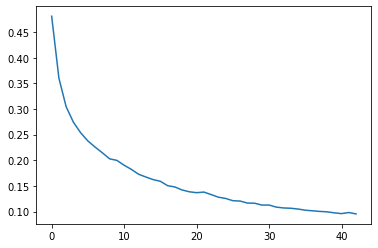

In [369]:
sns.lineplot(y = nn.loss_curve_, x = range(len(nn.loss_curve_)))

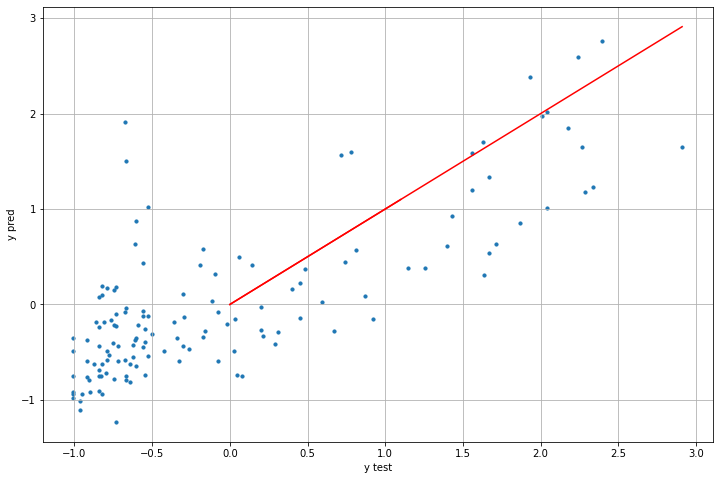

In [370]:
plt.figure(figsize=(12,8))
# plt.scatter(np.sort(y_test),np.sort(ypred),s=1)
plt.scatter(ytest,ypred_nn,s=10)
plt.xlabel('y test');plt.ylabel('y pred')
plt.plot(np.linspace(0,1.1),np.linspace(0,1.1),'r')
plt.plot(np.linspace(0,max(ytest)),np.linspace(0,max(ytest)),'r')
plt.grid()
plt.show()

In [371]:
nn.predict(Xtest)[:10]

/Users/oas/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


array([-0.5886222 , -0.2815429 ,  0.41686586, -0.75292536, -0.14236078,
        0.37730297,  0.08215979,  0.58119739, -0.59444529, -0.74118607])

In [372]:
ytest[:10]

566   -0.919027
322    0.672068
289   -0.194805
29     0.079522
320    0.452607
203    1.253641
611   -0.842216
372   -0.172859
472   -0.721512
75     0.046603
Name: asthma_hosp, dtype: float64

In [373]:
# With pipeline and without year
Xtrain_nn = Xtrain.drop(columns = "year")
Xtest_nn = Xtest.drop(columns = "year")
nn = MLPRegressor(hidden_layer_sizes=[250, 50, 5], max_iter=1000, solver = "adam", batch_size=10, early_stopping=True, validation_fraction=0.1)
model = make_pipeline(StandardScaler(), nn)
model.fit(Xtrain_nn,ytrain)
print(model.score(Xtrain_nn,ytrain))
model.score(Xtest_nn,ytest)

0.6386060581425801


0.5368145613326452

In [374]:
ypred_nn = model.predict(Xtest_nn)

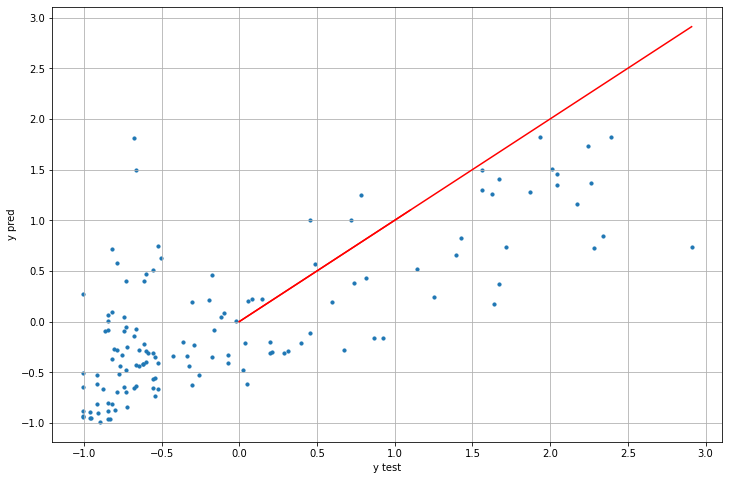

In [375]:
plt.figure(figsize=(12,8))
# plt.scatter(np.sort(y_test),np.sort(ypred),s=1)
plt.scatter(ytest,ypred_nn,s=10)
plt.xlabel('y test');plt.ylabel('y pred')
plt.plot(np.linspace(0,1.1),np.linspace(0,1.1),'r')
plt.plot(np.linspace(0,max(ytest)),np.linspace(0,max(ytest)),'r')
plt.grid()
plt.show()

In [376]:
df_air_ml[df_air_ml.Uhf == 106][["Measure", "Value"]].groupby("Measure").mean()

Value
Measure          
NO2      23.03750
O3       29.70750
PM2.5     9.25500
SO2       4.38375

[-0.84512807 -0.84512807 -0.84512807 -0.84512807 -0.84512807 -0.84512807
 -0.84512807 -0.84512807 -0.84512807 -0.84512807 -0.84512807 -0.84512807
 -0.84512807 -0.84512807 -0.84512807 -0.84512807 -0.84512807 -0.84512807
 -0.84512807 -0.84512807 -0.84512807 -0.84512807 -0.84512807 -0.84512807
 -0.84512807 -0.84512807 -0.84512807 -0.84512807 -0.84512807 -0.84512807
 -0.84512807 -0.84512807 -0.84512807 -0.84512807 -0.84512807 -0.84512807
 -0.84512807 -0.84512807 -0.84512807 -0.84512807 -0.84512807 -0.84512807
 -0.84512807 -0.84512807 -0.84512807 -0.84512807 -0.84512807 -0.84512807
 -0.84512807 -0.84512807 -0.84512807 -0.84512807 -0.84512807 -0.84512807
 -0.84512807 -0.84512807 -0.84512807 -0.84512807 -0.84512807 -0.84512807
 -0.84512807 -0.84512807 -0.84512807 -0.84512807 -0.84512807 -0.8131177
 -0.75194559 -0.69077347 -0.62960135 -0.56842924 -0.50725712 -0.446085
 -0.26935184 -0.09110309  0.08787799  0.26765326  0.44742854  0.62720381
  0.80697908  0.98309907  1.14970556  1.29340997  1.42

<AxesSubplot:>

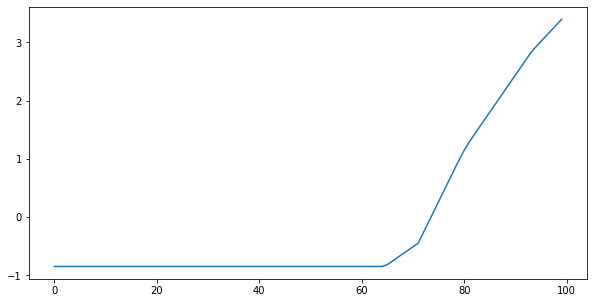

In [377]:
res = 100

sample = pd.DataFrame({
    "district" : [106]*res,
    "NO2" : np.linspace(23,0,res),
    "PM2_5" : np.linspace(10,0,res),
    "O3" : np.linspace(30,0,res),
    "SO2" : np.linspace(5,0,res),
    "0-4y" : [0]*res,
    "5-17y" : [1]*res,
})
predictions = model.predict(sample)
print(predictions)

plt.figure(figsize=(10,5))
sns.lineplot(y = predictions, x = range(res), )

In [378]:
df_hosp_ml_shift = df_hosp_ml[df_hosp_ml["0-4y"] == 0].drop(columns = ["0-4y","5-17y"]).sort_values(by = ["district", "year"]).reset_index(drop=True).rename(columns={"asthma_hosp":"n"})
df_hosp_ml_shift["next_n"] = df_hosp_ml_shift.n.shift(-1) # careful not to run multiple times
df_hosp_ml_shift = df_hosp_ml_shift[df_hosp_ml_shift.year != 2016] # all districts have max year 2016

df_hosp_ml_shift[:20]

year  district    NO2  PM2_5     O3   SO2    n  next_n
0   2009       101  23.20  11.03  23.67  6.62   31    35.0
1   2010       101  20.13  10.09  31.91  4.16   35    32.0
2   2011       101  20.79  10.65  31.24  5.31   32    27.0
3   2012       101  19.05   9.27  33.72  3.71   27    46.0
4   2013       101  18.23   8.88  30.37  2.23   46    46.0
5   2014       101  17.10   9.00  30.45  1.71   46    29.0
6   2015       101  17.82   9.17  28.72  1.00   29    28.0
8   2009       102  22.39  10.68  26.82  5.38  127   133.0
9   2010       102  20.21   9.65  33.96  3.37  133   151.0
10  2011       102  21.06  10.48  33.44  4.25  151   157.0
11  2012       102  20.02   9.11  35.09  2.80  157   172.0
12  2013       102  18.37   8.73  31.68  1.53  172   186.0
13  2014       102  18.97   9.00  31.49  1.61  186   160.0
14  2015       102  19.52   9.13  29.93  1.11  160   139.0
16  2009       103  24.82  11.10  24.47  9.48  344   278.0
17  2010       103  22.06  10.26  32.53  6.03  278   266.0
18  2011       103  22.61  10.77  32.08  7.67  266   284.0
19  2012       103  21.01   9.47  34.08  5.06  284   298.0
20  2013       103  19.89   9.06  30.79  3.15  298   345.0
21  2014       103  19.44   9.19  30.70  2.71  345   288.0

In [379]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df_hosp_ml_shift.drop, train_size=0.7)
ytrain

TypeError: Singleton array array(<bound method DataFrame.drop of      year  district    NO2  PM2_5     O3   SO2   n  next_n
0    2009       101  23.20  11.03  23.67  6.62  31    35.0
1    2010       101  20.13  10.09  31.91  4.16  35    32.0
2    2011       101  20.79  10.65  31.24  5.31  32    27.0
3    2012       101  19.05   9.27  33.72  3.71  27    46.0
4    2013       101  18.23   8.88  30.37  2.23  46    46.0
..    ...       ...    ...    ...    ...   ...  ..     ...
330  2011       504  13.50   9.29  35.93  1.56  23    23.0
331  2012       504  12.47   8.28  35.27  0.66  23    22.0
332  2013       504  11.51   7.82  32.66  0.39  22    19.0
333  2014       504  12.59   8.20  31.96  0.73  19    27.0
334  2015       504  11.91   7.29  34.07  0.22  27    12.0

[294 rows x 8 columns]>, dtype=object) cannot be considered a valid collection.

In [ ]:
# time shifted random forest thing
Xtrain.shift()
rf = RandomForestRegressor()
rf.fit(Xtrain, ytrain)
ypred = rf.predict(Xtest)
explained_variance_score(ytest, ypred)

0.9527312028733467

## end of Oliver code (for navigation)

In [ ]:
# end of olivers machine learning

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
def apply_OneHotEncoder(data_col):
    # creating instance of one-hot-encoder
    enc = OneHotEncoder(handle_unknown='ignore')
    # passing bridge-types-cat column (label encoded values of bridge_types)
    enc_df = pd.DataFrame(enc.fit_transform(data_col).toarray())
    d={}
    for i in range (0,len(np.unique(data_col))):
        d[i]=enc.categories_[0][i]
    enc_df=enc_df.rename(columns=d)
    return enc_df

In [ ]:
districts_enc=apply_OneHotEncoder(sorted_df[['district']])
districts_enc.head()

101  102  103  104  105  106  107  201  202  203  ...  405  406  407  408  \
0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   409  410  501  502  503  504  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 42 columns]

In [ ]:
age_groups_enc=apply_OneHotEncoder(sorted_df[['age_group']])
age_groups_enc.head()

0-4y  5-17y
0   1.0    0.0
1   0.0    1.0
2   1.0    0.0
3   0.0    1.0
4   1.0    0.0

Which is the most accurate way to handle Year values?

In [ ]:
pre_df=pd.concat([sorted_df.iloc[:,0],districts_enc,age_groups_enc,sorted_df.iloc[:,3:-1]],axis=1)
pre_df

year  101  102  103  104  105  106  107  201  202  ...  501  502  503  \
0    2009  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1    2009  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2    2009  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3    2009  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4    2009  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
..    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
667  2016  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0   
668  2016  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0   
669  2016  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0   
670  2016  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
671  2016  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

     504  0-4y  5-17y    NO2  PM2_5     O3   SO2  
0    0.0   1.0    0.0  23.20  11.03  23.67  6.62  
1    0.0   0.0    1.0  23.20  11.03  23.67  6.62  
2    0.0   1.0    0.0  22.39  10.68  26.82  5.38  
3    0.0   0.0    1.0  22.39  10.68  26.82  5.38  
4    0.0   1.0    0.0  24.82  11.10  24.47  9.48  
..   ...   ...    ...    ...    ...    ...   ...  
667  0.0   0.0    1.0  14.93   6.80  34.18  0.13  
668  0.0   1.0    0.0  14.11   7.10  34.68  0.12  
669  0.0   0.0    1.0  14.11   7.10  34.68  0.12  
670  1.0   1.0    0.0  11.52   6.59  36.17  0.11  
671  1.0   0.0    1.0  11.52   6.59  36.17  0.11  

[672 rows x 49 columns]

In [ ]:
pre_df.columns

Index([ 'year',     101,     102,     103,     104,     105,     106,     107,
           201,     202,     203,     204,     205,     206,     207,     208,
           209,     210,     211,     301,     302,     303,     304,     305,
           306,     307,     308,     309,     310,     401,     402,     403,
           404,     405,     406,     407,     408,     409,     410,     501,
           502,     503,     504,  '0-4y', '5-17y',   'NO2', 'PM2_5',    'O3',
         'SO2'],
      dtype='object')

In [ ]:
y=np.array(sorted_df.iloc[:,-1])

#### Two issues here: How should I handle the year column? Should I normalize the y value?

Normalize the data:

In [ ]:
from sklearn import preprocessing

In [ ]:
scaler = preprocessing.MinMaxScaler()
names = pre_df.columns
d = scaler.fit_transform(pre_df)
X_pre = pd.DataFrame(d, columns=names)
X_pre=X_pre.sort_values(by=['year'])
X_pre

/Users/oas/Library/Python/3.8/lib/python/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/oas/Library/Python/3.8/lib/python/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


year  101  102  103  104  105  106  107  201  202  ...  501  502  503  \
0     0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
60    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
59    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
58    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
57    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
..    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
611   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
610   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
609   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
617   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
671   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

     504  0-4y  5-17y       NO2     PM2_5        O3       SO2  
0    0.0   1.0    0.0  0.367494  0.558011  0.311957  0.542048  
60   0.0   1.0    0.0  0.351147  0.461878  0.420356  0.364696  
59   0.0   0.0    1.0  0.449544  0.553591  0.395945  0.438801  
58   0.0   1.0    0.0  0.449544  0.553591  0.395945  0.438801  
57   0.0   0.0    1.0  0.464634  0.598895  0.411667  0.416320  
..   ...   ...    ...       ...       ...       ...       ...  
611  0.0   0.0    1.0  0.245520  0.267403  0.709557  0.004996  
610  0.0   1.0    0.0  0.245520  0.267403  0.709557  0.004996  
609  0.0   0.0    1.0  0.212197  0.201105  0.750103  0.008326  
617  0.0   0.0    1.0  0.119145  0.125967  0.813405  0.005828  
671  1.0   0.0    1.0  0.000314  0.067403  0.829127  0.000000  

[672 rows x 49 columns]

In [ ]:
train_idx=450
X_train=X_pre[:train_idx];X_test=X_pre[train_idx:]
y_train=y[:train_idx];y_test=y[train_idx:]

Train a model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model= RandomForestRegressor(n_estimators=50,n_jobs=-1)
model.fit(X_train,y_train)

/Users/oas/Library/Python/3.8/lib/python/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


RandomForestRegressor(n_estimators=50, n_jobs=-1)

In [ ]:
y_pred=model.predict(X_test)

/Users/oas/Library/Python/3.8/lib/python/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
from sklearn.metrics import explained_variance_score

In [ ]:
explained_variance_score(y_test, y_pred)

0.16772486900725236

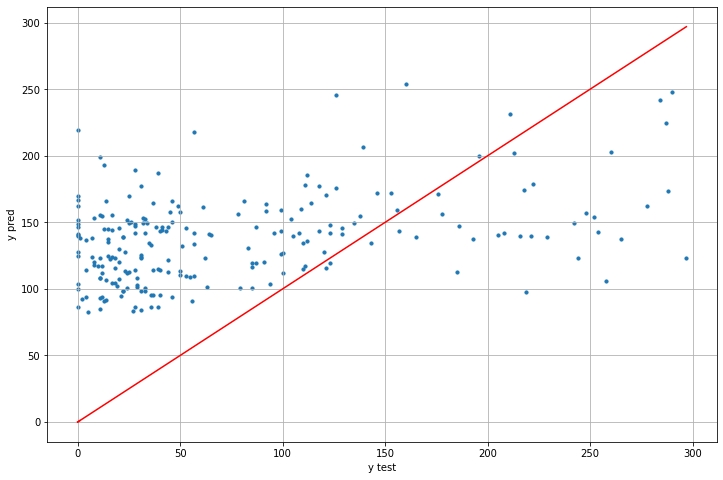

In [ ]:
plt.figure(figsize=(12,8))
# plt.scatter(np.sort(y_test),np.sort(ypred),s=1)
plt.scatter(y_test,y_pred,s=10)
plt.xlabel('y test');plt.ylabel('y pred')
plt.plot(np.linspace(0,1.1),np.linspace(0,1.1),'r')
plt.plot(np.linspace(0,max(y_test)),np.linspace(0,max(y_test)),'r')
plt.grid()
plt.show()

Poor results, although some correlation can be observed. However, results can be explained with plots like this one, where the first years air pollution and asthma hospitalization have similar levels, even though the last years they diverge a lot.

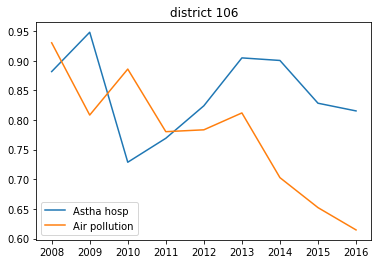

In [ ]:
plot_pollution_per_district(106)

### Missing some hyperparameter tunning

#### Some plots of the data extracted for the model

In [ ]:
sorted_df.head()

year  district age_group    NO2  PM2_5     O3   SO2  asthma_hosp
0  2009       101      0-4y  23.20  11.03  23.67  6.62           30
1  2009       101     5-17y  23.20  11.03  23.67  6.62           31
2  2009       102      0-4y  22.39  10.68  26.82  5.38          155
3  2009       102     5-17y  22.39  10.68  26.82  5.38          127
4  2009       103      0-4y  24.82  11.10  24.47  9.48          349

Let's see how the data evolved per district:

In [ ]:
import plotly.express as px


fig = px.scatter(sorted_df, x="PM2_5", y="asthma_hosp", color="year")
fig.show()

### More PM2.5 values do not strictly mean more asthma hospitalizations

Even though some positive correlation can be observed between the levels of PM2.5 and the number of asthma hospitalizations, it is clear that they are not strictly correlated. Note that levels of PM2.5 decrease by year, even though the number of hospitalizations still remains quite high in certain districts.

Let's dig more into this phenomenon to find which may be the cause of this effect.

In [ ]:
fig = px.scatter(sorted_df, x="NO2", y="asthma_hosp", color="year")
fig.show()

In [ ]:
fig = px.scatter(sorted_df, x="O3", y="asthma_hosp", color="year")
fig.show()

In [ ]:
fig = px.scatter(sorted_df, x="SO2", y="asthma_hosp", color="year")
fig.show()

Let's add the broroughs of each district as an extra column in the dataframe in order to facet the plots.

In [ ]:
nyc_ares=['Bronx','Brooklyn','Manhattan','Queens','Staten Island']
sorted_df['Boroughs']=[nyc_ares[int(str(el)[0])-1] for el in sorted_df.district]
sorted_df.head()

year  district age_group    NO2  PM2_5     O3   SO2  asthma_hosp Boroughs
0  2009       101      0-4y  23.20  11.03  23.67  6.62           30    Bronx
1  2009       101     5-17y  23.20  11.03  23.67  6.62           31    Bronx
2  2009       102      0-4y  22.39  10.68  26.82  5.38          155    Bronx
3  2009       102     5-17y  22.39  10.68  26.82  5.38          127    Bronx
4  2009       103      0-4y  24.82  11.10  24.47  9.48          349    Bronx

In [ ]:
fig = px.scatter(sorted_df, x="PM2_5", y="asthma_hosp", color="year",trendline="ols", facet_col="Boroughs")
fig.show()

Staten Island data is boring, so let's just delete it from the plot.

In [ ]:
non_staten_df=sorted_df[sorted_df.Boroughs!="Staten Island"]

fig = px.scatter(non_staten_df, x="PM2_5", y="asthma_hosp", color="year",trendline="ols", facet_col="Boroughs")
fig.show()

## When the trendline highly varies depending on the district we are located

Something really interesting can be observed here, and is the fact that really different regression trendlines can be observed depending on the neighbourhood. While in the Bronx the number of asthma hospitalizations strongly increases as the levels of PM2.5 increase, in Manhattan happens exactly the opposite. 

Bronx, Brookykn and Queens district seem to show the expected behaviour. As levels of PM2.5 increase, air becomes more polluted, and so the number of hospitalizations increases. However, why does the number of hospitalizations decrease in Manhattan as the levels of air pollution increase?

If we go to check the [Median Household Income](https://www.baruch.cuny.edu/nycdata/income-taxes/med_hhold_income.htm) on 2017 in NYC, we observe that the Bronx has the lowest value with a Median Household Income of 37.397 \\$ , while Manhattan has a value up to 85.071 \\$.

In [ ]:
# Let's study just the Manhattan particular case
man_df=sorted_df[sorted_df.Boroughs=="Manhattan"]
man_df.head()

year  district age_group    NO2  PM2_5     O3    SO2  asthma_hosp  \
36  2009       301      0-4y  28.50  11.55  21.82  11.12           85   
37  2009       301     5-17y  28.50  11.55  21.82  11.12           83   
38  2009       302      0-4y  31.06  11.60  21.52   8.21          127   
39  2009       302     5-17y  31.06  11.60  21.52   8.21          171   
40  2009       303      0-4y  29.90  11.55  22.84   7.04          128   

     Boroughs  
36  Manhattan  
37  Manhattan  
38  Manhattan  
39  Manhattan  
40  Manhattan

In [ ]:
fig = px.scatter(man_df, x="PM2_5", y="asthma_hosp",trendline="ols", facet_col="Boroughs",
                 color="district")
fig.show()

It can be seen how, even though higher levels of PM2.5, the lower Manhattan districts have less asthma hospitalizations. Two hypothesis can be extracted here:
1-Less asthma cases because less hospitals/population
2-Less asthma cases because better healthcare
3-Less asthma cases because PM2.5 is not correlated at all to asthma.

In [ ]:
fig = px.scatter(sorted_df, x="PM2_5", y="asthma_hosp", color="year",trendline="ols", facet_col="Boroughs")
fig.show()

### Ozone (O3) per borough and age group

In [ ]:
fig = px.scatter(sorted_df, x="O3", y="asthma_hosp", color="year",trendline="ols", 
                 facet_row="age_group",facet_col="Boroughs")
fig.show()

In [ ]:
fig = px.scatter(sorted_df, x="O3", y="asthma_hosp", color="year",trendline="ols", 
                 facet_row="age_group",facet_col="Boroughs")
fig.show()